# This Notebook for Exp0: Drug to Drug using CountVectorization of pairs of drugs  

In [ ]:
'''
    reporttype
---------
1= Spontaneous
2= Report from Study
3= Other
4= Not available to sender (unknown)


fulfillexpeditecriteria
-----------------------
1 = Industry expedited report
2 = Industry non-expedited report
3 = Direct Report
4 = 5-Day Report
5 = 30-Day Report

qualification
-------------
1= Physician
2= Pharmacist
3= Other Health Professional
4= Lawyer
5= Consumer or non-health professional


patientonsetageunit
------------------
800= Decade
801= Year
802= Month
803= Week
804= Day
805= Hour


patientagegroup
--------------
1= Neonate
2= Infant
3= Child
4= Adolescent
5= Adult
6= Elderly

patientweight
------------

patientsex
---------
0= unknown
1= male
2= female


drugcharacterization
----------------
1= suspect
2=concomitant
3= interacting

drugstructuredosageunit
---------------------
001= kg - kilogram(s) 002= G - gram(s)
003= Mg - milligram(s) 004= μg - microgram(s) 501= UNK - Unknown
502= μG/HR - Micrograms per Hour 503= TRI – Trimester
504= TOT - Total 505= CYC - Cyclical
506= MG/ML - Millligrams per Millilitres
507= AN - As necessary 508= mg/mg – milligrams per
milligrams
509= μg/μg - microgram(s) per microgram(s)


drugseparatedosagenumb:
 Number of separate dosages

drugintervaldosageunitnumb
  Number of units in the interval

drugintervaldosagedefinition
---------------------------
801= Year
802= Month
803= Week
804= Day
805= Hour
806= Minute
807= Second
810= Trimester
811= Cyclical
812= As Necessary
813= Total

drugcumulativedosagenumb:
 Cumulative dose to first reaction

drugcumulativedosageunit
-------------------------
001= kg kilogram(s)
002= G gram(s)
003= Mg milligram(s)
004= μg microgram(s)*

drugdosagetext: Text


drugindication: Text


actiondrug
------------
1= Drug Withdrawn
2= Dose reduced
3= Dose Increased
4= Dose not changed
5= Unknown
6= Not applicable

'''


'\n    reporttype\n---------\n1= Spontaneous\n2= Report from Study\n3= Other\n4= Not available to sender (unknown)\n\n\nfulfillexpeditecriteria\n-----------------------\n1 = Industry expedited report\n2 = Industry non-expedited report\n3 = Direct Report\n4 = 5-Day Report\n5 = 30-Day Report\n\nqualification\n-------------\n1= Physician\n2= Pharmacist\n3= Other Health Professional\n4= Lawyer\n5= Consumer or non-health professional\n\n\npatientonsetageunit\n------------------\n800= Decade\n801= Year\n802= Month\n803= Week\n804= Day\n805= Hour\n\n\npatientagegroup\n--------------\n1= Neonate\n2= Infant\n3= Child\n4= Adolescent\n5= Adult\n6= Elderly\n\npatientweight\n------------\n\npatientsex\n---------\n0= unknown\n1= male\n2= female\n\n\ndrugcharacterization\n----------------\n1= suspect\n2=concomitant\n3= interacting\n\ndrugstructuredosageunit\n---------------------\n001= kg - kilogram(s) 002= G - gram(s)\n003= Mg - milligram(s) 004= μg - microgram(s) 501= UNK - Unknown\n502= μG/HR - Mi

In [ ]:
#!pip install faers

In [ ]:
#import faers

# Initialize class and establish connection to FAERS database.
# This will create an object containing records from the UNITED STATES
# for all available years. Due to the size of the database this could take some
# time.

'''

f = faers.FAERS("faers.db", countries="japan", years=2012)
f.associated_events("metoprolol")
'''

'\n\nf = faers.FAERS("faers.db", countries="japan", years=2012)\nf.associated_events("metoprolol")\n'

## 2. Import libraries <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')

print(sys.version)
# 3.7.0 (default, Jun 29 2018, 20:13:13)
# [Clang 9.1.0 (clang-902.0.39.2)]

print(type(sys.version))

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
<class 'str'>


In [2]:
#!pip install matplotlib
#!pip install seaborn
!pip install nltk
#!pip install wordcloud
#!pip install gensim

In [3]:
import nltk
#nltk.download('stopwords')

In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

#from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
#stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
#from keras.optimizers import Adam
import itertools


## 3. Download data <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

In [ ]:
#!pip install rarfile


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
'''
import rarfile
import pandas as pd

# Specify the path to your .rar file
rar_path = '/content/gdrive/MyDrive/FDA/FullData/ADRAll.rar'
csv_file = 'ADRAll.csv'  # The name of the CSV file inside the .rar

# Use rarfile to open the archive
with rarfile.RarFile(rar_path) as opened_rar:
    file_names = opened_rar.namelist()
    print(file_names)
    # Extract the CSV file
    opened_rar.extract(csv_file)  # Optional: specify path to extract

    # Now read the CSV file using pandas
    faers_data = pd.read_csv( csv_file)

# Display the DataFrame to confirm it's loaded correctly
faers_data.shape
'''

"\nimport rarfile\nimport pandas as pd\n\n# Specify the path to your .rar file\nrar_path = '/content/gdrive/MyDrive/FDA/FullData/ADRAll.rar'\ncsv_file = 'ADRAll.csv'  # The name of the CSV file inside the .rar\n\n# Use rarfile to open the archive\nwith rarfile.RarFile(rar_path) as opened_rar:\n    file_names = opened_rar.namelist()\n    print(file_names)\n    # Extract the CSV file\n    opened_rar.extract(csv_file)  # Optional: specify path to extract\n\n    # Now read the CSV file using pandas\n    faers_data = pd.read_csv( csv_file)\n\n# Display the DataFrame to confirm it's loaded correctly\nfaers_data.shape\n"

In [6]:
#faers_data.to_pickle('/content/gdrive/MyDrive/FDA/FullData/ADRAll.pkl')
faers_data = pd.read_pickle('/content/gdrive/MyDrive/FDA/FullData/ADRAll.pkl')
faers_data.shape

(5948514, 87)

In [7]:
faers_data.shape, faers_data.columns

((5948514, 87),
 Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'messagetype',
        'messageformatversion', 'messageformatrelease', 'messagenumb',
        'messagesenderidentifier', 'messagereceiveridentifier',
        'messagedateformat', 'messagedate', 'safetyreportversion',
        'safetyreportid', 'primarysourcecountry', 'occurcountry',
        'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious',
        'receivedateformat', 'receivedate', 'receiptdateformat', 'receiptdate',
        'fulfillexpeditecriteria', 'companynumb', 'duplicate',
        'reportduplicate', 'duplicatesource', 'duplicatenumb', 'primarysource',
        'reportercountry', 'qualification', 'sender', 'sendertype',
        'senderorganization', 'receiver', 'receivertype',
        'receiverorganization', 'patient', 'patientonsetage',
        'patientonsetageunit', 'patientsex', 'reaction',
        'reactionmeddraversionpt', 'reactionmeddrapt', 'reactionoutcome',
        'drug', 'drugchara

In [ ]:
faers_data.drugrecuraction.value_counts()

drugrecuraction
Headache                                        425
Diarrhoea                                       390
Nausea                                          363
Injection site pain                             350
Rash                                            339
                                               ... 
Eyelid exfoliation                                1
Electrocardiogram T wave amplitude decreased      1
Gastrointestinal fistula                          1
Stress                                            1
Prostatism                                        1
Name: count, Length: 1892, dtype: int64

### Remove special characters from 'medicinalproduct' and treat the whole name as one token

In [8]:
def filter_medicinalproduct(product):
    product_str = str(product)  # Convert to string to ensure string operations work correctly
    if product_str.isdigit():  # Check if the entire string is numeric
        return False
    if len(product_str) < 3:  # Check if the length of the string is less than 3 characters
        return False
    return True

def clean_medicinalproduct(df):
  print('before', df.shape)

  df = df[df['medicinalproduct'].notnull()]

  # Remove special characters from 'medicinalproduct' and treat the whole name as one token
  df['medicinalproduct'] = df['medicinalproduct'].str.replace('[^\w\s]', '', regex=True).str.lower().str.replace(' ', '_')

  df['valid_medicinalproduct'] = df['medicinalproduct'].apply(filter_medicinalproduct)
  df = df[df['valid_medicinalproduct']]
  df.drop('valid_medicinalproduct', axis=1, inplace=True)  # Optionally remove the helper column

  df['medicinalproduct'] = df['medicinalproduct'].astype(str)
  # replace spece between multi-token substancename by "_" to be as one substance
  #df['medicinalproduct'] = df['medicinalproduct'].apply(lambda x: x.replace(' ','_') )

  print('after', df.shape)

  return df

faers_data = clean_medicinalproduct(faers_data)


before (5948514, 87)
after (5947613, 87)


In [9]:
faers_data.medicinalproduct.value_counts().head(20)

,count
medicinalproduct,
enbrel,237835
humira,158881
xarelto,65860
avandia,65501
revlimid,61496
tysabri,60954
prolia,59918
avonex,57709
tecfidera,53651


In [ ]:
faers_data.safetyreportid.value_counts().head(20),faers_data.safetyreportid.value_counts().shape

(safetyreportid
 9002414.0     9
 9319489.0     9
 8661027.0     8
 7898125.0     8
 10080058.0    8
 7153699.0     8
 8583598.0     8
 8351566.0     8
 9539849.0     8
 9707493.0     8
 9669159.0     8
 9024284.0     8
 7423316.0     7
 9422665.0     7
 9300726.0     7
 10359156.0    7
 11463165.0    7
 9695444.0     7
 8773602.0     7
 9027156.0     7
 Name: count, dtype: int64,
 (5557822,))

In [ ]:
'''
columns = ['seriousnessdisabling', 'seriousnessother', 'seriousnesshospitalization',
           'seriousnesslifethreatening', 'seriousnessdeath', 'seriousnesscongenitalanomali']
# Fill NaN with 0 for these columns
df= faers_data.copy()
df[columns] = df[columns].fillna(0)

# Define 'serious' class columns
serious_columns = ['seriousnessdeath',]
                   #'seriousnesshospitalization', 'seriousnesslifethreatening', ]

# Create binary target: 1 if any of 'serious' conditions is met, 0 otherwise
df['is_serious'] = df[serious_columns].max(axis=1)
df['is_serious'].value_counts()
'''

"\ncolumns = ['seriousnessdisabling', 'seriousnessother', 'seriousnesshospitalization',\n           'seriousnesslifethreatening', 'seriousnessdeath', 'seriousnesscongenitalanomali']\n# Fill NaN with 0 for these columns\ndf= faers_data.copy()\ndf[columns] = df[columns].fillna(0)\n\n# Define 'serious' class columns\nserious_columns = ['seriousnessdeath',]\n                   #'seriousnesshospitalization', 'seriousnesslifethreatening', ]\n\n# Create binary target: 1 if any of 'serious' conditions is met, 0 otherwise\ndf['is_serious'] = df[serious_columns].max(axis=1)\ndf['is_serious'].value_counts()\n"

In [ ]:
faers_data.serious.value_counts()

serious
1.0    3278525
2.0    2669958
Name: count, dtype: int64

In [ ]:
1

1

# Start filter rows with drugs within same day

In [11]:
# Selecting the relevant columns
#df = faers_data.drop_duplicates()
df = faers_data[['safetyreportid', 'medicinalproduct', 'drugstartdate','serious',
  'drugindication',
  'activesubstancename',
  'drugrecuraction',
  'patientagegroup','patientweight', 'patientsex','patientonsetage'
]]


df = df.drop_duplicates(subset=['safetyreportid', 'drugstartdate', 'medicinalproduct'])


# Deduplicate entries based on 'safetyreportid', 'parsed_date', and 'medicinalproduct'
deduped = df.drop_duplicates(subset=['safetyreportid', 'drugstartdate', 'medicinalproduct'])
print(df.shape , deduped.shape)
# Now perform a simple groupby count on the deduped DataFrame
counts = deduped.groupby(['safetyreportid', 'drugstartdate'])['medicinalproduct'].count().reset_index(name='group_count')
# Assign unique group IDs using ngroup()
counts['group_id'] = deduped.groupby(['safetyreportid', 'drugstartdate']).ngroup()
# Perform grouping on the original DataFrame and assign group IDs
df['group_id'] = df.groupby(['safetyreportid', 'drugstartdate']).ngroup()
# Merge the group count back onto the original DataFrame using the unique group ID as a key
df = df.merge(counts[['safetyreportid', 'drugstartdate', 'group_count']], on=['safetyreportid', 'drugstartdate'])

df = df[df.group_count>1]
df.shape

(5778106, 11) (5778106, 11)


(129230, 13)

In [ ]:
df[df.safetyreportid==7153699].sort_values(by='group_id')

,safetyreportid,medicinalproduct,drugstartdate,serious,drugindication,activesubstancename,drugrecuraction,patientagegroup,patientweight,patientsex,patientonsetage,group_id,group_count
715639,7153699.0,glivec,20090911.0,1.0,PRODUCT USED FOR UNKNOWN INDICATION,IMATINIB MESYLATE,NaN,NaN,NaN,2.0,68.0,4927,2
715640,7153699.0,sandostatin_lar_depot,20090911.0,1.0,DIARRHOEA,OCTREOTIDE ACETATE,NaN,NaN,NaN,2.0,68.0,4927,2
896883,7153699.0,glivec,20160719.0,1.0,PRODUCT USED FOR UNKNOWN INDICATION,IMATINIB MESYLATE,NaN,NaN,NaN,2.0,68.0,4929,2
896884,7153699.0,sandostatin_lar_depot,20160719.0,1.0,PRODUCT USED FOR UNKNOWN INDICATION,OCTREOTIDE ACETATE,NaN,NaN,NaN,2.0,68.0,4929,2


# Pairing products

In [ ]:
from itertools import combinations

def create_filtered_pairs(group):
    # This function assumes 'group' is a subset of the dataframe with the same 'safetyreportid'
    pairs = []
    products = group['medicinalproduct'].tolist()
    serious = group['serious'].tolist()

    # Create pairs only for entries with the same 'serious' value
    for (p1, s1), (p2, s2) in combinations(zip(products, serious), 2):
        if s1 == s2:
            pairs.append({'medicinalproduct1': p1, 'medicinalproduct2': p2, 'serious': s1})

    return pairs

# Apply function to each group
pairs_list = df.groupby(['safetyreportid','group_id']).apply(create_filtered_pairs).reset_index(name='pairs')

# Explode pairs to form a new DataFrame
pairs_list = pairs_list.explode('pairs').dropna().reset_index(drop=True)

# Ensure safetyreportid is carried over when exploding pairs
# Here we need to merge the exploded pairs back with the original safetyreportid
expanded_df = pd.json_normalize(pairs_list['pairs'])  # Normalize dictionary to dataframe
expanded_df['safetyreportid'] = pairs_list['safetyreportid']  # Add 'safetyreportid' back to the dataframe
expanded_df['group_id'] = pairs_list['group_id']  # Add 'safetyreportid' back to the dataframe

expanded_df = df.merge(expanded_df[['safetyreportid', 'group_id','medicinalproduct1',	'medicinalproduct2']] ,
                       on=['safetyreportid', 'group_id'])

expanded_df = expanded_df.drop_duplicates(subset=['safetyreportid', 'group_id' ])
expanded_df.drop(columns=['medicinalproduct','drugstartdate','group_count'] , inplace=True)

In [ ]:
df.shape, expanded_df.shape

((129230, 13), (60842, 12))

# Imputing Demographic data

In [ ]:
demographic_features = expanded_df[['safetyreportid', 'patientagegroup','patientweight', 'patientsex','patientonsetage']] #
# Calculate the mode of each column. Note that mode() returns a DataFrame because there can be multiple modes.
modes = demographic_features.mode(dropna=True)  # dropna=True ensures NaN is not considered as a mode

# Since mode can return multiple rows if there are ties, we take the first occurrence with iloc[0]
modes = modes.iloc[0]

# Fill NaN values with these modes
for c in ['safetyreportid', 'patientagegroup','patientweight', 'patientsex','patientonsetage']:
  expanded_df[c].fillna(modes[c], inplace=True)

In [ ]:
serious_map = { 1: 0, 2: 1}
# Apply the mapping
expanded_df['serious'] = expanded_df['serious'].map(serious_map)


In [ ]:
expanded_df['serious'].value_counts()

serious
0    42651
1    18191
Name: count, dtype: int64

In [ ]:
expanded_df.isnull().sum()

safetyreportid             0
serious                    0
drugindication          1118
activesubstancename     3159
drugrecuraction        60621
patientagegroup            0
patientweight              0
patientsex                 0
patientonsetage            0
group_id                   0
medicinalproduct1          0
medicinalproduct2          0
dtype: int64

In [ ]:
#expanded_df.to_pickle('/content/gdrive/MyDrive/FDA/DDI/ready_data.pkl')
expanded_df = pd.read_pickle('/content/gdrive/MyDrive/FDA/DDI/ready_data.pkl')
expanded_df.shape

(60842, 12)

In [ ]:
expanded_df.columns

Index(['safetyreportid', 'serious', 'drugindication', 'activesubstancename',
       'drugrecuraction', 'patientagegroup', 'patientweight', 'patientsex',
       'patientonsetage', 'group_id', 'medicinalproduct1',
       'medicinalproduct2'],
      dtype='object')

In [ ]:
expanded_df[expanded_df.safetyreportid==7153699]

,safetyreportid,serious,drugindication,activesubstancename,drugrecuraction,patientagegroup,patientweight,patientsex,patientonsetage,group_id,medicinalproduct1,medicinalproduct2
67087,7153699.0,1.0,PRODUCT USED FOR UNKNOWN INDICATION,IMATINIB MESYLATE,NaN,NaN,NaN,2.0,68.0,4927,glivec,sandostatin_lar_depot
85106,7153699.0,1.0,PRODUCT USED FOR UNKNOWN INDICATION,IMATINIB MESYLATE,NaN,NaN,NaN,2.0,68.0,4929,glivec,sandostatin_lar_depot


In [ ]:
expanded_df[expanded_df.safetyreportid==9539849]

,safetyreportid,serious,drugindication,activesubstancename,drugrecuraction,patientagegroup,patientweight,patientsex,patientonsetage,group_id,medicinalproduct1,medicinalproduct2
47006,9539849.0,0,PRODUCT USED FOR UNKNOWN INDICATION,BUPROPION HYDROCHLORIDE,NaN,5.0,60.0,2.0,65.0,545518,wellbutrin,depoprovera


In [ ]:
len(expanded_df.medicinalproduct1.unique())

8348

# Vectorize Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from scipy import sparse


vectorizer = CountVectorizer()
product1_vec  = vectorizer.fit_transform(expanded_df.medicinalproduct1)
print(product1_vec.shape)
product2_vec  = vectorizer.fit_transform(expanded_df.medicinalproduct1)
print(product2_vec.shape)
pairs_vec = product1_vec + product1_vec
print(pairs_vec.shape)

(60842, 8348)
(60842, 8348)
(60842, 8348)


# Run only if you want to add demographic data

In [ ]:

for c in ['patientagegroup', 'patientweight', 'patientsex','patientonsetage']:
    # This ensures it's a column vector suitable for hstack
    demo_array = expanded_df[c].astype(float).to_numpy().reshape(-1, 1)

    # Convert the numpy array to a sparse matrix
    demo_sparse = sparse.csr_matrix(demo_array)

    # Check the shape to ensure correctness
    print(f"Shape of {c}: {demo_sparse.shape}")

    # Concatenate with the existing sparse matrix
    pairs_vec = sparse.hstack([pairs_vec, demo_sparse])




Shape of patientagegroup: (60842, 1)
Shape of patientweight: (60842, 1)
Shape of patientsex: (60842, 1)
Shape of patientonsetage: (60842, 1)


In [ ]:
pairs_vec.shape

(60842, 8352)

In [ ]:
X= pairs_vec
y = expanded_df['serious']


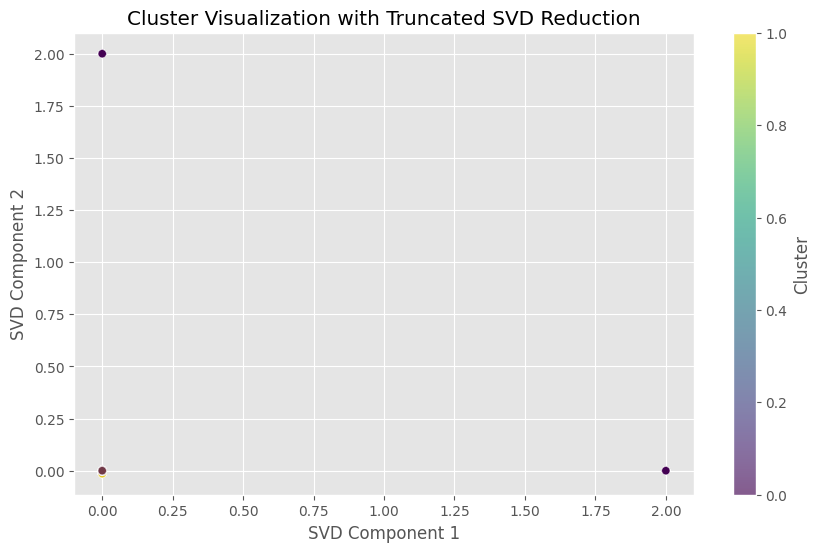

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
# Initialize and apply TruncatedSVD
# This component can work similarly to PCA but is suitable for sparse matrices
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)  # Assuming X is your sparse feature matrix

# Separate the reduced data into two components for plotting
x_component, y_component = X_svd[:, 0], X_svd[:, 1]


# Assuming 'clusters' contains the cluster labels obtained from any clustering method like K-means
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_component, y_component, c=y, cmap='viridis', alpha=0.6, edgecolors='w')
plt.title('Cluster Visualization with Truncated SVD Reduction')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
random_seed = 42


In [ ]:
y.value_counts()

serious
0    42651
1    18191
Name: count, dtype: int64

In [ ]:
!pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Configure cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define and train Logistic Regression
#log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model = XGBClassifier(n_estimators=100, random_state=random_seed)

predictions = cross_val_predict(log_reg_model, X, y, cv=cv) # method='predict_proba',
#predictions = np.argmax(predictions_pro, axis=1)
accuracy = accuracy_score(y, predictions)
f1 = f1_score(y, predictions, average='macro')
roc_auc = roc_auc_score(y, predictions)
conf_matrix = confusion_matrix(y, predictions)
print(f"Accuracy = {accuracy:.4f}")
print(f"F1 Score = {f1:.4f}")
print(f"ROC AUC Score = {roc_auc:.4f}")
print('Confusion Matrix:')
print(conf_matrix)
cm_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
# Print the normalized confusion matrix
print(cm_norm)

print(classification_report(y, predictions))

Accuracy = 0.7664
F1 Score = 0.6412
ROC AUC Score = 0.6309
Confusion Matrix:
[[41285  1366]
 [12847  5344]]
[[0.96797261 0.03202739]
 [0.70622835 0.29377165]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     42651
           1       0.80      0.29      0.43     18191

    accuracy                           0.77     60842
   macro avg       0.78      0.63      0.64     60842
weighted avg       0.77      0.77      0.73     60842



In [ ]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier  # Note: CatBoost requires a separate installation

# Set a random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)


In [ ]:
# Define classifiers
# Count the instances of each class
class_counts = y.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1]

classifiers = {
    'Logistic Regression': LogisticRegression(random_state=random_seed, class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),  # No inherent support for class_weight, consider using SMOTE
    'XGBoost Classifier': XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss',
                                        scale_pos_weight=scale_pos_weight, random_state=random_seed),
    'LightGBM Classifier': LGBMClassifier(n_estimators=100, verbose=-1, class_weight='balanced', random_state=random_seed),
    'CatBoost Classifier': CatBoostClassifier(verbose=0, random_state=random_seed, auto_class_weights='Balanced'),  # CatBoost has an automatic class weight estimator
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=100, class_weight='balanced', random_state=random_seed)

}



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score,precision_score, recall_score


def evaluate_classification(x, y, experiment_name='Default', results_df=None):
    print(f"----------------Evaluating {experiment_name}...")
    if results_df is None:
        results_df = pd.DataFrame(columns=['Model', 'Experiment', 'Accuracy','F1 Score','Precision','Recall','ROC AUC Score', 'Confusion Matrix'])

    k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

    for name, clf in classifiers.items():
        print(f"Training {name}...")
        #predictions = cross_val_predict(clf, x, y, cv=k_fold)
        predictions_proba = cross_val_predict(clf, x, y, cv=k_fold, method='predict_proba')
        predictions_proba = predictions_proba[:, 1]
        predictions = (predictions_proba > 0.5).astype(int)

        accuracy = accuracy_score(y, predictions)
        f1 = f1_score(y, predictions, average='macro')
        precision, recall = precision_score(y, predictions, average='macro'), recall_score(y, predictions, average='macro')

        roc_auc = roc_auc_score(y, predictions_proba)
        conf_matrix = confusion_matrix(y, predictions)

        print(f"{name}: Accuracy = {accuracy:.4f}")
        print(f"{name}: F1 Score = {f1:.4f}")
        print(f"{name}: ROC AUC Score = {roc_auc:.4f}")
        print('Confusion Matrix:')
        print(conf_matrix)
        cm_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        # Print the normalized confusion matrix
        print(cm_norm)
        print(classification_report(y, predictions))

        print('-'*50)
        prediction_df = pd.DataFrame({
            'True Labels': y,
            'Predicted Labels': predictions,
            'Predicted Probabilities': predictions_proba
        })

        # Save to CSV
        prediction_df.to_excel(f'/content/gdrive/MyDrive/FDA/DDI/exp0/predictions_results_{experiment_name}-{name}.xlsx', index=False)


        # Create a new DataFrame for the record
        new_record = pd.DataFrame({
            'Model': [name],
            'Experiment': [experiment_name],
            'Accuracy': [accuracy],
            'F1 Score': [f1],
            'Precision':[precision],
            'Recall' :[recall],
            'ROC AUC Score': [roc_auc],
            'Confusion Matrix': [cm_norm]
        })

        # Concatenate the new record to the existing DataFrame
        results_df = pd.concat([results_df, new_record], ignore_index=True)

        results_df.to_excel('/content/gdrive/MyDrive/FDA/DDI/exp0/results.xlsx', index=False)

    return results_df

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
expanded_df['serious'].value_counts()

serious
0    42651
1    18191
Name: count, dtype: int64

In [ ]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
results_df= None
X = X.astype(np.float32)
results_df = evaluate_classification(X, y, experiment_name='CountVectorization_withDemographic', results_df=results_df)


----------------Evaluating CountVectorization_withDemographic...
Training Logistic Regression...
Logistic Regression: Accuracy = 0.7364
Logistic Regression: F1 Score = 0.6630
Logistic Regression: ROC AUC Score = 0.7389
Confusion Matrix:
[[36599  6052]
 [ 9986  8205]]
[[0.85810415 0.14189585]
 [0.54895278 0.45104722]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     42651
           1       0.58      0.45      0.51     18191

    accuracy                           0.74     60842
   macro avg       0.68      0.65      0.66     60842
weighted avg       0.72      0.74      0.73     60842

--------------------------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors: Accuracy = 0.7106
K-Nearest Neighbors: F1 Score = 0.6373
K-Nearest Neighbors: ROC AUC Score = 0.6835
Confusion Matrix:
[[35291  7360]
 [10247  7944]]
[[0.82743664 0.17256336]
 [0.56330053 0.43669947]]
              precision    recall  f1-score   sup

In [ ]:
#results_df= None
X = X.astype(np.float32)
results_df = evaluate_classification(X, y, experiment_name='CountVectorization', results_df=results_df)


----------------Evaluating CountVectorization...
Training Logistic Regression...
Logistic Regression: Accuracy = 0.7031
Logistic Regression: F1 Score = 0.6772
Logistic Regression: ROC AUC Score = 0.7861
Confusion Matrix:
[[30006 12645]
 [ 5418 12773]]
[[0.70352395 0.29647605]
 [0.29783959 0.70216041]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77     42651
           1       0.50      0.70      0.59     18191

    accuracy                           0.70     60842
   macro avg       0.67      0.70      0.68     60842
weighted avg       0.74      0.70      0.71     60842

--------------------------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors: Accuracy = 0.7186
K-Nearest Neighbors: F1 Score = 0.6513
K-Nearest Neighbors: ROC AUC Score = 0.6932
Confusion Matrix:
[[35230  7421]
 [ 9698  8493]]
[[0.82600642 0.17399358]
 [0.53312077 0.46687923]]
              precision    recall  f1-score   support

          

# Stop here

In [ ]:
# Assuming X and y are defined and properly prepared as your feature set and labels
results_df = evaluate_classification(X, y, experiment_name='Initial Classification', results_df=None)
results_df

Training Logistic Regression...
Logistic Regression: Accuracy = 0.7590
Logistic Regression: F1 Score = 0.6282
Logistic Regression: ROC AUC Score = 0.6179
Confusion Matrix:
[[ 5701 13709]
 [ 2861 46480]]
[[0.29371458 0.70628542]
 [0.05798423 0.94201577]]
              precision    recall  f1-score   support

         0.0       0.67      0.29      0.41     19410
         1.0       0.77      0.94      0.85     49341

    accuracy                           0.76     68751
   macro avg       0.72      0.62      0.63     68751
weighted avg       0.74      0.76      0.72     68751

--------------------------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors: Accuracy = 0.7580
K-Nearest Neighbors: F1 Score = 0.6759
K-Nearest Neighbors: ROC AUC Score = 0.6649
Confusion Matrix:
[[ 8754 10656]
 [ 5980 43361]]
[[0.45100464 0.54899536]
 [0.12119738 0.87880262]]
              precision    recall  f1-score   support

         0.0       0.59      0.45      0.51     19410
     

,Model,Experiment,Accuracy,F1 Score,ROC AUC Score,Confusion Matrix
0,Logistic Regression,Initial Classification,0.758985,0.628170,0.617865,"[[5701, 13709], [2861, 46480]]"
1,K-Nearest Neighbors,Initial Classification,0.758025,0.675907,0.664904,"[[8754, 10656], [5980, 43361]]"
2,XGBoost Classifier,Initial Classification,0.797647,0.723995,0.706696,"[[9662, 9748], [4164, 45177]]"
3,LightGBM Classifier,Initial Classification,0.798883,0.710803,0.689259,"[[8491, 10919], [2908, 46433]]"
4,CatBoost Classifier,Initial Classification,0.802650,0.723046,0.702369,"[[9162, 10248], [3320, 46021]]"
5,SGD Classifier,Initial Classification,0.637765,0.577579,0.584151,"[[8948, 10462], [14442, 34899]]"
6,Extra Trees Classifier,Initial Classification,0.779669,0.696033,0.680232,"[[8770, 10640], [4508, 44833]]"
7,Gaussian Naive Bayes,Initial Classification,0.689183,0.611430,0.610066,"[[8314, 11096], [10273, 39068]]"


In [ ]:
results_df

In [ ]:
filtered_faers_data[[
        'safetyreportid',  'transmissiondate', 'receivedate',  'receiptdate','drugstartdate','drugenddate',  'serious',
 'patientonsetage', 'patientsex', 'reactionmeddrapt', 'reactionoutcome',
        'drug', 'drugcharacterization', 'medicinalproduct', 'drugdosagetext',
       'drugadministrationroute', 'drugindication',
        'activesubstance', 'activesubstancename',
        'actiondrug', 'summary',
        'narrativeincludeclinical',
      'drugrecurreadministration',
        'literaturereference', 'patientagegroup',
        'patientweight', 'drugseparatedosagenumb', 'drugintervaldosageunitnumb',
        'drugintervaldosagedefinition',
         'drugcumulativedosagenumb',
        'drugcumulativedosageunit', 'drugadditional',
        'drugrecurrence', 'drugrecuraction',
        'drugtreatmentduration', 'drugtreatmentdurationunit']]

,safetyreportid,transmissiondate,receivedate,receiptdate,drugstartdate,drugenddate,serious,patientonsetage,patientsex,reactionmeddrapt,...,drugseparatedosagenumb,drugintervaldosageunitnumb,drugintervaldosagedefinition,drugcumulativedosagenumb,drugcumulativedosageunit,drugadditional,drugrecurrence,drugrecuraction,drugtreatmentduration,drugtreatmentdurationunit
235884,3759885.0,20150721.0,20020131.0,20150218.0,20000208.0,20000208.0,1.0,56.0,1.0,Human herpesvirus 8 infection,...,1.0,1.0,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5701020,3759885.0,20140414.0,20020131.0,20130612.0,20000208.0,20020116.0,1.0,56.0,1.0,Gastric polyps,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912300,3948114.0,20160305.0,20030528.0,20151229.0,20020514.0,NaN,1.0,0.0,2.0,Foetal exposure during pregnancy,...,1.0,1.0,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4342069,3948114.0,20161109.0,20030528.0,20160826.0,20020514.0,NaN,1.0,0.0,2.0,Foetal exposure during pregnancy,...,1.0,1.0,804.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4505534,4083807.0,20160526.0,20040209.0,20160323.0,2000.0,NaN,1.0,NaN,2.0,Papilloedema,...,1.0,1.0,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532340,14027791.0,20180321.0,20170929.0,20171214.0,20120127.0,2015.0,1.0,65.0,1.0,Lower gastrointestinal haemorrhage,...,2.0,1.0,804.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
1748271,14028370.0,20171128.0,20170930.0,20170930.0,20170803.0,NaN,1.0,46.0,2.0,Arthritis,...,1.0,1.0,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2450161,14028370.0,20180321.0,20170930.0,20171218.0,20170803.0,NaN,1.0,46.0,2.0,Arthritis,...,2.0,1.0,804.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1704654,14030122.0,20171128.0,20170930.0,20170930.0,20170626.0,20170712.0,1.0,NaN,NaN,Fatigue,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd


# Selecting the relevant columns
df = faers_data[['safetyreportid', 'medicinalproduct']]

# Drop any rows with missing data in these columns
df.dropna(subset=['safetyreportid', 'medicinalproduct'], inplace=True)

# Group by safetyreportid and remove duplicates within each group to ensure uniqueness
df_unique = df.drop_duplicates(subset=['safetyreportid', 'medicinalproduct'])

# Create a DataFrame to count the drugs per safety report ID
drug_counts = df_unique.groupby('safetyreportid').nunique()

# Filter out the safetyreportid with less than three unique drugs
valid_reports = drug_counts[drug_counts['medicinalproduct'] >= 2].index

# Filter the original dataframe to include only valid reports
filtered_df = df[df['safetyreportid'].isin(valid_reports)]

C:\Users\ezzmo\AppData\Local\Temp\ipykernel_61256\659813366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['safetyreportid', 'medicinalproduct'], inplace=True)


In [ ]:
filtered_df.shape

(360186, 2)

In [ ]:
drug_counts[drug_counts['medicinalproduct'] >= 2]

,medicinalproduct
safetyreportid,
3759885.0,2
3839792.0,2
3942227.0,2
3948114.0,2
3996584.0,2
...,...
14027716.0,2
14027791.0,2
14028370.0,2


In [ ]:
filtered_faers_data = faers_data[faers_data.safetyreportid.isin(filtered_df.safetyreportid)].sort_values('safetyreportid')
filtered_faers_data[[
        'safetyreportid',  'transmissiondate', 'receivedate',  'receiptdate','drugstartdate','drugenddate',  'serious',
 'patientonsetage', 'patientsex', 'reactionmeddrapt', 'reactionoutcome',
        'drug', 'drugcharacterization', 'medicinalproduct', 'drugdosagetext',
       'drugadministrationroute', 'drugindication',
        'activesubstance', 'activesubstancename',
        'actiondrug', 'summary',
        'narrativeincludeclinical',
      'drugrecurreadministration',
        'literaturereference', 'patientagegroup',
        'patientweight', 'drugseparatedosagenumb', 'drugintervaldosageunitnumb',
        'drugintervaldosagedefinition',
         'drugcumulativedosagenumb',
        'drugcumulativedosageunit', 'drugadditional',
        'drugrecurrence', 'drugrecuraction',
        'drugtreatmentduration', 'drugtreatmentdurationunit']]

,safetyreportid,transmissiondate,receivedate,receiptdate,drugstartdate,drugenddate,serious,patientonsetage,patientsex,reactionmeddrapt,...,drugseparatedosagenumb,drugintervaldosageunitnumb,drugintervaldosagedefinition,drugcumulativedosagenumb,drugcumulativedosageunit,drugadditional,drugrecurrence,drugrecuraction,drugtreatmentduration,drugtreatmentdurationunit
5701020,3759885.0,20140414.0,20020131.0,20130612.0,20000208.0,20020116.0,1.0,56.0,1.0,Gastric polyps,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235884,3759885.0,20150721.0,20020131.0,20150218.0,20000208.0,20000208.0,1.0,56.0,1.0,Human herpesvirus 8 infection,...,1.0,1.0,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4185318,3839792.0,20161109.0,20020918.0,20160825.0,20020218.0,20020215.0,1.0,0.0,2.0,Foetal exposure during pregnancy,...,1.0,1.0,804.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
755043,3839792.0,20160305.0,20020918.0,20151211.0,20020710.0,20020710.0,1.0,0.0,2.0,Foetal exposure during pregnancy,...,1.0,1.0,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2902791,3839792.0,20130627.0,20020918.0,20121128.0,20020710.0,20020710.0,1.0,1.0,2.0,Cleft palate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450161,14028370.0,20180321.0,20170930.0,20171218.0,20170803.0,NaN,1.0,46.0,2.0,Arthritis,...,2.0,1.0,804.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1879932,14028386.0,20171128.0,20170930.0,20170930.0,NaN,NaN,2.0,NaN,2.0,Cough,...,1.0,1.0,802.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2573216,14028386.0,20180321.0,20170930.0,20171204.0,NaN,NaN,2.0,NaN,2.0,Cough,...,1.0,1.0,802.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
1704654,14030122.0,20171128.0,20170930.0,20170930.0,20170626.0,20170712.0,1.0,NaN,NaN,Fatigue,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


(267612, 4)

In [ ]:
df[df.safetyreportid== 9268915]

,safetyreportid,medicinalproduct,drugstartdate,parsed_date,time_diff,new_group,group_id
2008722,9268915.0,CYMBALTA,20120523,2012-05-23,0 days,0,0
365078,9268915.0,CRANBERRY.,20120523,2012-05-23,0 days,0,0
4864957,9268915.0,D50W,20120523,2012-05-23,0 days,0,0
5144788,9268915.0,PREDNISONE,20120523,2012-05-23,0 days,0,0
4505724,9268915.0,ACTEMRA,20120523,2012-05-23,0 days,0,0
1660650,9268915.0,METHOTREXATE.,20120523,2012-05-23,0 days,0,0


In [ ]:
(df.safetyreportid.value_counts()>1).sum()

73638

In [ ]:
filtered_faers_data = faers_data.loc[df.index].sort_values('safetyreportid')
filtered_faers_data[[
        'safetyreportid',  'transmissiondate', 'receivedate',  'receiptdate','drugstartdate','drugenddate',  'serious',
 'patientonsetage', 'patientsex', 'reactionmeddrapt', 'reactionoutcome',
        'drug', 'drugcharacterization', 'medicinalproduct', 'drugdosagetext',
       'drugadministrationroute', 'drugindication',
        'activesubstance', 'activesubstancename',
        'actiondrug', 'summary',
        'narrativeincludeclinical',
      'drugrecurreadministration',
        'literaturereference', 'patientagegroup',
        'patientweight', 'drugseparatedosagenumb', 'drugintervaldosageunitnumb',
        'drugintervaldosagedefinition',
         'drugcumulativedosagenumb',
        'drugcumulativedosageunit', 'drugadditional',
        'drugrecurrence', 'drugrecuraction',
        'drugtreatmentduration', 'drugtreatmentdurationunit']]

,safetyreportid,transmissiondate,receivedate,receiptdate,drugstartdate,drugenddate,serious,patientonsetage,patientsex,reactionmeddrapt,...,drugseparatedosagenumb,drugintervaldosageunitnumb,drugintervaldosagedefinition,drugcumulativedosagenumb,drugcumulativedosageunit,drugadditional,drugrecurrence,drugrecuraction,drugtreatmentduration,drugtreatmentdurationunit
5701020,3759885.0,20140414.0,20020131.0,20130612.0,20000208.0,20020116.0,1.0,56.0,1.0,Gastric polyps,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235884,3759885.0,20150721.0,20020131.0,20150218.0,20000208.0,20000208.0,1.0,56.0,1.0,Human herpesvirus 8 infection,...,1.0,1.0,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912300,3948114.0,20160305.0,20030528.0,20151229.0,20020514.0,NaN,1.0,0.0,2.0,Foetal exposure during pregnancy,...,1.0,1.0,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4342069,3948114.0,20161109.0,20030528.0,20160826.0,20020514.0,NaN,1.0,0.0,2.0,Foetal exposure during pregnancy,...,1.0,1.0,804.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4864944,4083807.0,20170207.0,20040209.0,20161107.0,2000.0,NaN,1.0,59.0,2.0,Hot flush,...,2.0,1.0,804.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532340,14027791.0,20180321.0,20170929.0,20171214.0,20120127.0,2015.0,1.0,65.0,1.0,Lower gastrointestinal haemorrhage,...,2.0,1.0,804.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
1748271,14028370.0,20171128.0,20170930.0,20170930.0,20170803.0,NaN,1.0,46.0,2.0,Arthritis,...,1.0,1.0,804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2450161,14028370.0,20180321.0,20170930.0,20171218.0,20170803.0,NaN,1.0,46.0,2.0,Arthritis,...,2.0,1.0,804.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1704654,14030122.0,20171128.0,20170930.0,20170930.0,20170626.0,20170712.0,1.0,NaN,NaN,Fatigue,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
faers_data.drugstartdateformat.value_counts()

102.0    2275944
610.0     665406
602.0     414071
Name: drugstartdateformat, dtype: int64

In [ ]:
faers_data.drugrecuraction.value_counts().head(50)

Headache                                                 425
Diarrhoea                                                390
Nausea                                                   363
Injection site pain                                      350
Rash                                                     339
Dizziness                                                255
Drug ineffective                                         219
Completed suicide                                        205
Vomiting                                                 192
Pruritus                                                 189
Fatigue                                                  185
Neutropenia                                              165
Arthralgia                                               159
Urticaria                                                150
Dyspnoea                                                 144
Injection site erythema                                  130
Pyrexia                 

In [ ]:
#faers_data.reactionmeddrapt.value_counts().head(20)
#Hepatitis


#
#faers_data.reactionmeddrapt.str.contains('Neutropenic sepsis').sum()
faers_data.reactionmeddrapt.value_counts().head(50)

Drug ineffective                                 228902
Death                                            198283
Off label use                                     89956
Fatigue                                           67075
Nausea                                            65860
Headache                                          61732
Diarrhoea                                         59629
Drug dose omission                                57224
Malaise                                           54322
Rash                                              49083
Pain                                              48944
Dyspnoea                                          48262
Injection site pain                               47565
Myocardial infarction                             45177
Dizziness                                         42081
Drug hypersensitivity                             41814
Pneumonia                                         38011
Vomiting                                        

In [ ]:
#safetyreportid,medicinalproduct
#Gastrointestinal haemorrhage
#Blood glucose increased
faers_data[faers_data.reactionmeddrapt == 'Death'].activesubstancename.value_counts().head(40)

DENOSUMAB                                                                        11952
DARBEPOETIN ALFA                                                                  8144
CALCIUM CHLORIDE\DEXTROSE\MAGNESIUM CHLORIDE\SODIUM CHLORIDE\SODIUM LACTATE       4980
LENALIDOMIDE                                                                      3833
IMATINIB MESYLATE                                                                 3710
ENZALUTAMIDE                                                                      3368
NIVOLUMAB                                                                         2373
AMBRISENTAN                                                                       2282
AFLIBERCEPT                                                                       2047
ADALIMUMAB                                                                        1840
PARICALCITOL                                                                      1652
LEUPROLIDE ACETATE                         

In [ ]:
faers_data.safetyreportid.fillna(0, inplace=True)
faers_data = faers_data[faers_data.safetyreportid !=0]
faers_data.safetyreportid = faers_data.safetyreportid.astype(int)
faers_data.safetyreportid.value_counts()

#(faers_data.safetyreportid.value_counts()>1).sum()

9319489     9
9002414     9
9539849     8
10080058    8
8583598     8
           ..
13290563    1
13290345    1
13290078    1
13290076    1
9559509     1
Name: safetyreportid, Length: 5557832, dtype: int64

In [ ]:
faers_data.shape

(5948514, 87)

In [ ]:
faers_data = faers_data.drop_duplicates()

In [ ]:
faers_data.dropna(subset=['activesubstancename'], inplace=True)

In [ ]:
faers_data.shape

(4413507, 87)

# Apply Deep Learning

In [ ]:
faers_data['activesubstancename'] =faers_data['activesubstancename'].astype(str)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, GlobalMaxPooling1D, Concatenate



In [ ]:

# 1. Extract NLP features from faers_data (activesubstancename)
# Tokenize and encode activesubstancename column
max_features = 10000
maxlen = 50
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(faers_data['activesubstancename'])

In [ ]:
#from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Approach 1
sequence_data = tokenizer.texts_to_sequences(faers_data['activesubstancename'])
nlp_features = pad_sequences(sequence_data, maxlen=maxlen)


In [ ]:
faers_data['seriousness_level'] = 0
faers_data.loc[faers_data['serious']==1, 'seriousness_level'] =1

In [ ]:
# Prepare the target variable (seriousness) and split the data into training and testing sets
target = faers_data['seriousness_level']
print(faers_data.shape)

small_faers_data, X_test_nlp, small_faers_target, y_test = train_test_split(faers_data, target, test_size=0.90, random_state=42, stratify=target)
print(small_faers_data.shape)

(4413507, 88)
(441350, 88)


In [ ]:
#Approach 2
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Extract NLP features (TF-IDF) from faers_data (activesubstancename)
vectorizer = TfidfVectorizer(max_features=5000)
nlp_features = vectorizer.fit_transform(small_faers_data['activesubstancename'])#.toarray()


In [ ]:
nlp_features.shape

(441350, 2911)

In [ ]:
# 2. Prepare faers_data demographic data (patientagegroup, patientweight, patientsex, etc) features
demographic_features = small_faers_data[['patientagegroup', 'patientweight', 'patientsex']]

# Encode categorical features and scale continuous features
categorical_columns = ['patientagegroup', 'patientsex']
continuous_columns = ['patientweight']

# Encode categorical columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    demographic_features[column] = label_encoder.fit_transform(demographic_features[column])

# Scale continuous columns
scaler = MinMaxScaler()
demographic_features[continuous_columns] = scaler.fit_transform(demographic_features[continuous_columns])
demographic_features.shape

C:\Users\ezzmo\AppData\Local\Temp\ipykernel_24392\3542123774.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_features[column] = label_encoder.fit_transform(demographic_features[column])
C:\Users\ezzmo\AppData\Local\Temp\ipykernel_24392\3542123774.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_features[continuous_columns] = scaler.fit_transform(demographic_features[continuous_columns])


(441350, 3)

In [ ]:
def Build_model1():
    # 3. Use one layer CNN to encode NLP features
    input_nlp = Input(shape=(maxlen,))
    embedding_layer = Embedding(max_features, 128)(input_nlp)
    conv_layer1 = Conv1D(64, 3, activation='relu')(embedding_layer)
    conv_layer2 = Conv1D(10, 3, activation='relu')(conv_layer1)
    pooled_layer = GlobalMaxPooling1D()(conv_layer2)

    # 4. Use a Deep Learning model that takes encoded features + demographic features to predict seriousness
    input_demo = Input(shape=(demographic_features.shape[1],))
    concat_layer = Concatenate()([pooled_layer, input_demo])
    dense_layer = Dense(64, activation='relu')(concat_layer)
    output_layer = Dense(1, activation='sigmoid')(dense_layer)


    model = Model(inputs=[input_nlp, input_demo], outputs=output_layer)

    # Compile and train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model
model = Build_model1()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 50, 128)      1280000     input_12[0][0]                   
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 48, 64)       24640       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 46, 10)       1930        conv1d_5[0][0]                   
____________________________________________________________________________________________

In [ ]:
def Build_model2():
    # 3. Use a Deep Learning model that takes NLP features + demographic features to predict seriousness_level
    input_nlp = Input(shape=(nlp_features.shape[1],))
    dense_layer1_nlp = Dense(128, activation='relu')(input_nlp)
    dense_layer2_nlp = Dense(10, activation='relu')(dense_layer1_nlp)

    input_demo = Input(shape=(demographic_features.shape[1],))
    concat_layer = Concatenate()([dense_layer2_nlp, input_demo])
    dense_layer1 = Dense(128, activation='relu')(concat_layer)
    dense_layer2 = Dense(64, activation='relu')(dense_layer1)
    output_layer = Dense(1, activation='sigmoid')(dense_layer2)

    model = Model(inputs=[input_nlp, input_demo], outputs=output_layer)

    # Compile and train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.summary()
    return model
model = Build_model2()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2911)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          372736      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           1290        dense[0][0]                      
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 3)]          0                                            
______________________________________________________________________________________________

In [ ]:

# Prepare the target variable (seriousness) and split the data into training and testing sets
'''

target = faers_data['seriousness_level']
print(faers_data.shape)

faers_data_50_nlp, X_test_nlp, faers_data_50_demo, X_test_demo, faers_data_50_target, y_test = train_test_split(nlp_features, demographic_features, target, test_size=0.90, random_state=42, stratify=target)
'''

print(small_faers_data.shape)

X_train_nlp, X_test_nlp, X_train_demo, X_test_demo, y_train, y_test = train_test_split(nlp_features, demographic_features, small_faers_target, test_size=0.2, random_state=42, stratify=small_faers_target)

(441350, 88)


In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

model.fit([X_train_nlp.toarray(), X_train_demo], y_train, epochs=3, batch_size=10,
          validation_data=([X_test_nlp.toarray(), X_test_demo], y_test))


Physical devices cannot be modified after being initialized
Epoch 1/3
35308/35308 [==============================] - 193s 5ms/step - loss: nan - accuracy: 0.4667 - val_loss: nan - val_accuracy: 0.4667
Epoch 2/3
35308/35308 [==============================] - 194s 5ms/step - loss: nan - accuracy: 0.4667 - val_loss: nan - val_accuracy: 0.4667
Epoch 3/3
35308/35308 [==============================] - 201s 6ms/step - loss: nan - accuracy: 0.4667 - val_loss: nan - val_accuracy: 0.4667


In [ ]:

# Make predictions on the test set
y_pred = model.predict([X_test_nlp, X_test_demo])
y_pred = np.round(y_pred).flatten().astype(int)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Filter cases where patients were taking multiple medications

In [ ]:
multiple_drugs = faers_data[faers_data.groupby("safetyreportid")["medicinalproduct"].transform("count") > 1]
multiple_drugs.shape

(740644, 87)

In [ ]:
multiple_drugs.safetyreportid.value_counts()

9002414.0     9
9319489.0     9
9024284.0     8
9539849.0     8
8661027.0     8
             ..
11591373.0    2
11591357.0    2
11591132.0    2
11590986.0    2
9274674.0     2
Name: safetyreportid, Length: 349983, dtype: int64

In [ ]:
multiple_drugs[multiple_drugs.safetyreportid==9002414]

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,messagetype,messageformatversion,messageformatrelease,messagenumb,messagesenderidentifier,messagereceiveridentifier,messagedateformat,...,seriousnesslifethreatening,seriousnessdeath,drugcumulativedosagenumb,drugcumulativedosageunit,drugadditional,seriousnesscongenitalanomali,drugrecurrence,drugrecuraction,drugtreatmentduration,drugtreatmentdurationunit
565154,565154,565154,248082.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873045,873045,873045,157112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210984,1210984,1210984,180346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1531089,1531089,211180,211180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
2228849,2228849,908940,220152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2566682,2566682,1246773,205071.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4028415,4028415,197390,197390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4303245,4303245,472220,156163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4688534,4688534,857509,227838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create drug pairs for each patient

In [ ]:
def create_drug_pairs(drugs):
    return list(itertools.combinations(sorted(drugs), 2))

drug_pairs_data = multiple_drugs.groupby("safetyreportid")["medicinalproduct"].apply(create_drug_pairs).reset_index()


In [ ]:
drug_pairs_data.head()

,safetyreportid,medicinalproduct
0,3758721,"[(SYNTHROID, SYNTHROID)]"
1,3759885,"[(HUMULIN R (INSULIN HUMAN), INSULIN NOS)]"
2,3839792,"[(COMBIVIR, RETROVIR), (COMBIVIR, RETROVIR), (..."
3,3942227,"[(GLIVEC, RETINOIC ACID)]"
4,3948114,"[(HALDOL, ZYPREXA)]"


In [ ]:
drug_pairs_data.explode("medicinalproduct")

,safetyreportid,medicinalproduct
0,3758721,"(SYNTHROID, SYNTHROID)"
1,3759885,"(HUMULIN R (INSULIN HUMAN), INSULIN NOS)"
2,3839792,"(COMBIVIR, RETROVIR)"
2,3839792,"(COMBIVIR, RETROVIR)"
2,3839792,"(RETROVIR, RETROVIR)"
...,...,...
349978,14028355,"(COZAAR, COZAAR)"
349979,14028357,"(GILENYA, GILENYA)"
349980,14028370,"(ARCOXIA, PREDNISONE.)"
349981,14028386,"(COSENTYX, METHOTREXATE.)"


In [ ]:
drug_pair_adverse_events = drug_pairs_data.explode("medicinalproduct").merge(multiple_drugs, on="safetyreportid")
drug_pair_adverse_events.shape


(1069320, 88)

In [ ]:

drug_pair_adverse_events = drug_pair_adverse_events.rename(columns={'medicinalproduct_x':'medicinalproduct'})


In [ ]:
drug_pair_adverse_events.head()

,safetyreportid,medicinalproduct,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,messagetype,messageformatversion,messageformatrelease,messagenumb,messagesenderidentifier,...,seriousnesslifethreatening,seriousnessdeath,drugcumulativedosagenumb,drugcumulativedosageunit,drugadditional,seriousnesscongenitalanomali,drugrecurrence,drugrecuraction,drugtreatmentduration,drugtreatmentdurationunit
0,3758721,"(SYNTHROID, SYNTHROID)",4302656,471631,155574.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
1,3758721,"(SYNTHROID, SYNTHROID)",4688324,857299,227628.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3759885,"(HUMULIN R (INSULIN HUMAN), INSULIN NOS)",235884,235884,235884.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3759885,"(HUMULIN R (INSULIN HUMAN), INSULIN NOS)",5701020,565106,109841.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3839792,"(COMBIVIR, RETROVIR)",755043,755043,39110.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
drug_pair_adverse_events.reactionmeddrapt.value_counts().head(20)

Myocardial infarction           24243
Drug ineffective                21490
Death                           16401
Cerebrovascular accident        14555
Gastrointestinal haemorrhage    13543
Fatigue                         13335
Off label use                   13218
Injury                          12222
Dyspnoea                        11695
Diarrhoea                       11220
Headache                        11043
Gynaecomastia                   10965
Nausea                          10421
Malaise                          9879
Pain                             9637
Drug hypersensitivity            8551
Pneumonia                        7809
Dizziness                        7772
Drug dose omission               6614
Product use issue                6116
Name: reactionmeddrapt, dtype: int64

In [ ]:
drug_pair_adverse_events['seriousness_level'] = 0
drug_pair_adverse_events.loc[drug_pair_adverse_events['serious']==1, 'seriousness_level'] =1

In [ ]:
adverse_event_counts = drug_pair_adverse_events.groupby("medicinalproduct")["seriousness_level"].value_counts().unstack().fillna(0)
adverse_event_counts.shape

(123660, 2)

In [ ]:
def fill_day(date_string):
    try:

        date_string = str(date_string ).split('.')[0]
        if len( date_string ) == 6:  # Check if the date string has only year and month parts
            date_string = date_string + '01'
            #print('mis-d',str(date_string ))
            return  date_string   # Append the day part '01' to the date string

        elif len( date_string ) == 4:  # Check if the date string has only year and month parts
            if int(date_string) < 500:
                print(date_string)

            date_string  = date_string + '01'+ '01'
            #print('mis-m-d',str(date_string ))
            return  date_string #+ '01'+ '01'  # Append the day part '01' to the date string


    except :
        print('Error', date_string )
    return date_string



drug_pair_adverse_events['drugstartdate_dt'] = pd.to_datetime( drug_pair_adverse_events['drugstartdate'].apply(fill_day),
                                                           format='%Y%m%d'  , errors='coerce')
drug_pair_adverse_events['drugenddate_dt'] = pd.to_datetime( drug_pair_adverse_events['drugenddate'].apply(fill_day),
                                                         format='%Y%m%d'   , errors='coerce')
drug_pair_adverse_events['difference'] = drug_pair_adverse_events['drugenddate_dt']  - drug_pair_adverse_events['drugstartdate_dt']

drug_pair_adverse_events[ ['drugstartdate_dt','drugstartdate','drugenddate_dt','drugenddate','difference']]

,drugstartdate_dt,drugstartdate,drugenddate_dt,drugenddate,difference
0,NaT,NaN,NaT,NaN,NaT
1,NaT,NaN,NaT,NaN,NaT
2,2000-02-08,20000208.0,2000-02-08,20000208.0,0 days
3,2000-02-08,20000208.0,2002-01-16,20020116.0,708 days
4,2002-07-10,20020710.0,2002-07-10,20020710.0,0 days
...,...,...,...,...,...
1069315,2017-08-03,20170803.0,NaT,NaN,NaT
1069316,NaT,NaN,NaT,NaN,NaT
1069317,NaT,NaN,NaT,NaN,NaT
1069318,2017-06-26,20170626.0,2017-07-12,20170712.0,16 days


In [ ]:
drug_pair_adverse_events['difference'].value_counts().head(20)

0 days       41090
4 days        5174
2 days        4676
1 days        4513
365 days      4378
7 days        3744
3 days        3621
31 days       3585
6 days        3495
14 days       3491
28 days       3464
-1 days       3414
30 days       2859
5 days        2828
61 days       2545
21 days       2505
13 days       2468
1461 days     2429
1096 days     2292
9 days        2154
Name: difference, dtype: int64

In [ ]:
adverse_event_counts  = adverse_event_counts.reset_index()
adverse_event_counts.columns = ['medicinalproduct','NoDeath', 'Death']

In [ ]:
adverse_event_counts = adverse_event_counts[ ~((adverse_event_counts.NoDeath>0) & (adverse_event_counts.Death>0)) ]
adverse_event_counts.shape

(109439, 3)

In [ ]:
def diff_drug_name(x):
    if x[0]!=x[1]:
        return True
    return False
adverse_event_counts = adverse_event_counts[adverse_event_counts.medicinalproduct.apply(diff_drug_name)]
adverse_event_counts.shape

(101892, 3)

In [ ]:
adverse_event_counts[adverse_event_counts.Death>0]

,medicinalproduct,NoDeath,Death
1,"( BUPIVACAINE (NO PREF. NAME), BUPIVACAINE)",0.0,2.0
2,"( COPAXONE, ETODOLAC.)",0.0,2.0
3,"( DACLATASVIR, PEG-INTERFERON ALFA 2A)",0.0,2.0
5,"( HEPARIN, PREDNISONE.)",0.0,2.0
6,"( LIBERTY DIALYSIS CYCLER TUBING, BISACODYL.)",0.0,2.0
...,...,...,...
123637,"(ZYRTEC, ZYRTEC /0...",0.0,2.0
123638,"(ZYRTEC, ZYRTEC (CETIRAZINE HYDROCHLORIDE))",0.0,2.0
123639,"(ZYRTEC, ZYRTEC ALLERGY)",0.0,2.0
123640,"(ZYRTEC, ZYRTEC IR)",0.0,2.0


In [ ]:
import pandas as pd
import zipfile

# Specify the zip file and the data files you want to read
zip_file = "../FAERS/faers_ascii_2022q2.zip"

# Read the data files from the zip file
with zipfile.ZipFile(zip_file, 'r') as zf:
    for f in zf.filelist:
        print(f)


<ZipInfo filename='ASCII/' external_attr=0x10>
<ZipInfo filename='ASCII/ASC_NTS.pdf' compress_type=deflate external_attr=0x20 file_size=317222 compress_size=283504>
<ZipInfo filename='ASCII/DEMO22Q2.pdf' compress_type=deflate external_attr=0x20 file_size=313361 compress_size=165307>
<ZipInfo filename='ASCII/DEMO22Q2.txt' compress_type=deflate external_attr=0x20 file_size=62849513 compress_size=12505752>
<ZipInfo filename='ASCII/DRUG22Q2.pdf' compress_type=deflate external_attr=0x20 file_size=336440 compress_size=130620>
<ZipInfo filename='ASCII/DRUG22Q2.txt' compress_type=deflate external_attr=0x20 file_size=181503321 compress_size=30195032>
<ZipInfo filename='ASCII/INDI22Q2.pdf' compress_type=deflate external_attr=0x20 file_size=182647 compress_size=112327>
<ZipInfo filename='ASCII/INDI22Q2.txt' compress_type=deflate external_attr=0x20 file_size=53542151 compress_size=6966557>
<ZipInfo filename='ASCII/OUTC22Q2.pdf' compress_type=deflate external_attr=0x20 file_size=146475 compress_siz

In [ ]:
import pandas as pd
import zipfile

# Specify the zip file and the data files you want to read
demo_file = "ASCII/DEMO22Q2.txt"

drug_file = "ASCII/DRUG22Q2.txt"
reaction_file = "ASCII/REAC22Q2.txt"

zip_file = "../FAERS/faers_ascii_2022q2.zip"

# Read the data files from the zip file
with zipfile.ZipFile(zip_file, 'r') as zf:
    demo_data = pd.read_csv(zf.open(demo_file), delimiter='$', low_memory=False)
    drug_data = pd.read_csv(zf.open(drug_file), delimiter='$', low_memory=False)
    reaction_data = pd.read_csv(zf.open(reaction_file), delimiter='$', low_memory=False)

# Merge the data files based on the primary key (ISR)
merged_data = demo_data.merge(drug_data, on=['primaryid', 'caseid'], how='inner').merge(reaction_data, on=['primaryid', 'caseid'], how='inner')

# Perform necessary pre-processing and cleaning on the merged_data DataFrame


In [ ]:
drug_data.shape, demo_data.shape, reaction_data.shape,merged_data.shape

((1828103, 20), (435618, 25), (1464627, 4), (16004932, 45))

In [ ]:
merged_data.columns, merged_data.primaryid.value_counts()

(Index(['primaryid', 'caseid', 'caseversion', 'i_f_code', 'event_dt', 'mfr_dt',
        'init_fda_dt', 'fda_dt', 'rept_cod', 'auth_num', 'mfr_num', 'mfr_sndr',
        'lit_ref', 'age', 'age_cod', 'age_grp', 'sex', 'e_sub', 'wt', 'wt_cod',
        'rept_dt', 'to_mfr', 'occp_cod', 'reporter_country', 'occr_country',
        'drug_seq', 'role_cod', 'drugname', 'prod_ai', 'val_vbm', 'route',
        'dose_vbm', 'cum_dose_chr', 'cum_dose_unit', 'dechal', 'rechal',
        'lot_num', 'exp_dt', 'nda_num', 'dose_amt', 'dose_unit', 'dose_form',
        'dose_freq', 'pt', 'drug_rec_act'],
       dtype='object'),
 1920027821    69520
 1605363514    54750
 1638803219    37800
 1745014216    32085
 1595647236    28044
               ...  
 208408471         1
 208408492         1
 208408521         1
 208408541         1
 207958231         1
 Name: primaryid, Length: 435618, dtype: int64)

In [ ]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 87 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0.2                  100000 non-null  int64  
 1   Unnamed: 0                    100000 non-null  int64  
 2   Unnamed: 0.1                  100000 non-null  int64  
 3   messagetype                   1 non-null       object 
 4   messageformatversion          1 non-null       float64
 5   messageformatrelease          1 non-null       float64
 6   messagenumb                   1 non-null       object 
 7   messagesenderidentifier       1 non-null       object 
 8   messagereceiveridentifier     1 non-null       object 
 9   messagedateformat             1 non-null       float64
 10  messagedate                   1 non-null       float64
 11  safetyreportversion           99999 non-null   float64
 12  safetyreportid                99999 non-null 

In [ ]:
extra_features = [
        'drugdosagetext',
        'drugindication',
        'reporttype',
        'fulfillexpeditecriteria',
        'qualification',
        'patientonsetageunit',
        'patientagegroup',
        'patientweight',
        'patientsex',
        'drugcharacterization',
        'drugstructuredosageunit',
        'drugseparatedosagenumb',
        'drugintervaldosageunitnumb',
        'drugintervaldosagedefinition',
        'drugcumulativedosagenumb',
        'drugcumulativedosageunit',
        'actiondrug'
    ]

In [ ]:
for c in extra_features:
    print()
    print('---------'+c+'----------------')
    print(tweet[c].value_counts())


---------drugdosagetext----------------
UNK                                                                  9931
DATES OF AVANDIA USE COULD NOT BE CONFIRMED IN RECORDS REVIEWED.     3569
50 MG, QWK                                                           2476
AVANDIA WAS NOT LISTED AMONG THE PATIENTS RECORDS REVIEWED.          2105
UNK, UNKNOWN                                                         1074
                                                                     ... 
PATERNAL DRUG EXPOSURE                                                  1
LAST DOSE DATE: 09/MAR/2015                                             1
TAKE 2 PINK TABS QAM, 1 BEIGE COLORED TABLET TWICE DAILY (AM +PM)       1
2 PINK TABS DAILY; 1 BEIGE TAB BID                                      1
DAY EIGHT DOSE                                                          1
Name: drugdosagetext, Length: 14157, dtype: int64

---------drugindication----------------
PRODUCT USED FOR UNKNOWN INDICATION    21949
DIABETES 

# Candidate to be Target for classifications:
### actiondrug:  (Drug Withdrawn =1 ,Dose changed= 4 )
- 2= Dose reduced
- 3= Dose Increased
- 4= Dose not changed

# Candidate to be added to feature list :
### qualification:
- 1= Physician
- 2= Pharmacist
- 3= Other Health Professional 4= Lawyer
- 5= Consumer or non-health

### patientagegroup
- 1= Neonate
- 2= Infant
- 3= Child
- 4= Adolescent
- 5= Adult
- 6= Elderly

### patientweight

### patientsex
- 1= male
- 2= female


In [ ]:
tweet['drugindication'].value_counts()[:10]/tweet['drugindication'].shape[0]   # usage of drug

PRODUCT USED FOR UNKNOWN INDICATION    0.21949
DIABETES MELLITUS                      0.13221
RHEUMATOID ARTHRITIS                   0.05001
MULTIPLE SCLEROSIS                     0.03139
PLASMA CELL MYELOMA                    0.02395
PSORIASIS                              0.02069
CROHN^S DISEASE                        0.02058
PERITONEAL DIALYSIS                    0.01847
PSORIATIC ARTHROPATHY                  0.01611
TYPE 2 DIABETES MELLITUS               0.01369
Name: drugindication, dtype: float64

In [ ]:
columns = [
    'serious',
    'reactionmeddrapt',
    'reactionoutcome',
    'medicinalproduct',
    'drugdosagetext',
    'drugindication',
    'activesubstancename',
    'seriousnessdisabling',
    'seriousnessother',
    'seriousnesshospitalization',
    'seriousnesslifethreatening',
    'seriousnessdeath',
    'seriousnesscongenitalanomali',
    #added
    'drugindication',
    'patientagegroup' ,
    'patientweight',
    'patientsex',
    'qualification'
]


In [ ]:
tweet = tweet[columns]

In [ ]:
tweet.to_csv('Filtered_data.csv')

# Restart from here

In [ ]:
import pandas as pd
tweet = pd.read_csv('Filtered_data.csv')

In [ ]:
seriousness_map = {
'seriousnessother':1,
'seriousnesshospitalization':2,
'seriousnessdisabling':3,
'seriousnesscongenitalanomali':4,
'seriousnesslifethreatening':5,
'seriousnessdeath':6
    }

In [ ]:
'''
# Label compositions
tweet['seriousness_level']=""

tweet.loc[tweet.seriousnessother==1, 'seriousness_level']=  \
            tweet.loc[tweet.seriousnessother==1,'seriousness_level'] + \
            tweet.loc[tweet.seriousnessother==1,'seriousnessother'].apply(lambda z: 'o' )

tweet.loc[tweet.seriousnesshospitalization==1,'seriousness_level']= \
        tweet.loc[tweet.seriousnesshospitalization==1,'seriousness_level'] + \
            tweet.loc[tweet.seriousnesshospitalization==1,'seriousnesshospitalization'].apply(lambda z: 'h' )

tweet.loc[tweet.seriousnessdisabling==1,'seriousness_level']= \
            tweet.loc[tweet.seriousnessdisabling==1,'seriousness_level'] +\
        tweet.loc[tweet.seriousnessdisabling==1,'seriousnessdisabling'].apply(lambda z: 'd' )

tweet.loc[tweet.seriousnesscongenitalanomali==1,'seriousness_level']=\
    tweet.loc[tweet.seriousnesscongenitalanomali==1,'seriousness_level']+ \
    tweet.loc[tweet.seriousnesscongenitalanomali==1,'seriousnesscongenitalanomali'].apply(lambda z: 'c' )

tweet.loc[tweet.seriousnesslifethreatening==1,'seriousness_level']=\
    tweet.loc[tweet.seriousnesslifethreatening==1,'seriousness_level']+\
    tweet.loc[tweet.seriousnesslifethreatening==1,'seriousnesslifethreatening'].apply(lambda z: 'l' )

tweet.loc[tweet.seriousnessdeath==1,'seriousness_level']=\
    tweet.loc[tweet.seriousnessdeath==1,'seriousness_level']+\
    tweet.loc[tweet.seriousnessdeath==1,'seriousnessdeath'].apply(lambda z:'d' )

most_common_classes = tweet.seriousness_level.value_counts()
most_common_classes = most_common_classes [most_common_classes>2000].index
most_common_classe

tweet = tweet[tweet.seriousness_level !=""]
tweet = tweet[tweet.seriousness_level.isin(most_common_classes) ]


'''

'\n# Label compositions\ntweet[\'seriousness_level\']=""\n\ntweet.loc[tweet.seriousnessother==1, \'seriousness_level\']=              tweet.loc[tweet.seriousnessother==1,\'seriousness_level\'] +             tweet.loc[tweet.seriousnessother==1,\'seriousnessother\'].apply(lambda z: \'o\' )\n\ntweet.loc[tweet.seriousnesshospitalization==1,\'seriousness_level\']=         tweet.loc[tweet.seriousnesshospitalization==1,\'seriousness_level\'] +             tweet.loc[tweet.seriousnesshospitalization==1,\'seriousnesshospitalization\'].apply(lambda z: \'h\' )\n\ntweet.loc[tweet.seriousnessdisabling==1,\'seriousness_level\']=             tweet.loc[tweet.seriousnessdisabling==1,\'seriousness_level\'] +        tweet.loc[tweet.seriousnessdisabling==1,\'seriousnessdisabling\'].apply(lambda z: \'d\' )\n\ntweet.loc[tweet.seriousnesscongenitalanomali==1,\'seriousness_level\']=    tweet.loc[tweet.seriousnesscongenitalanomali==1,\'seriousness_level\']+     tweet.loc[tweet.seriousnesscongenitalanomali==1,\'

In [ ]:
#Hamza
'''
tweet['seriousness_level']=0

'seriousnessother':1,
'seriousnesshospitalization':2,
'seriousnessdisabling':3,
'seriousnesscongenitalanomali':4,
'seriousnesslifethreatening':5,
'seriousnessdeath':6
class_name = 'seriousnessdeath'
tweet.loc[tweet[class_name]==1, 'seriousness_level']=  tweet.loc[tweet[class_name]==1,class_name].apply(lambda z: 1 )
'''


"\ntweet['seriousness_level']=0\n\n'seriousnessother':1,\n'seriousnesshospitalization':2,\n'seriousnessdisabling':3,\n'seriousnesscongenitalanomali':4,\n'seriousnesslifethreatening':5,\n'seriousnessdeath':6\nclass_name = 'seriousnessdeath' \ntweet.loc[tweet[class_name]==1, 'seriousness_level']=  tweet.loc[tweet[class_name]==1,class_name].apply(lambda z: 1 )\n"

In [ ]:
#tweet['seriousness_level'] = tweet['reactionoutcome']

In [ ]:
#tweet['seriousness_level'] = tweet['serious']
tweet.columns

Index(['Unnamed: 0', 'serious', 'reactionmeddrapt', 'reactionoutcome',
       'medicinalproduct', 'drugdosagetext', 'drugindication',
       'activesubstancename', 'seriousnessdisabling', 'seriousnessother',
       'seriousnesshospitalization', 'seriousnesslifethreatening',
       'seriousnessdeath', 'seriousnesscongenitalanomali', 'drugindication.1',
       'patientagegroup', 'patientweight', 'patientsex', 'qualification'],
      dtype='object')

## Use classes of death or not


In [ ]:
'''

tweet['seriousness_level'] = -1

seriousness_pd = tweet[['seriousnessdeath','seriousnessother','seriousnessdisabling',
            'seriousnesshospitalization','seriousnesslifethreatening','seriousnesscongenitalanomali'
                        ,'reactionoutcome','serious'
                        #, 'seriousness_level'
                       ]]

seriousness_pd.fillna(0, inplace=True)
seriousness_pd['sum_seriousness'] = seriousness_pd.sum(axis =1)
both_indexes=  (seriousness_pd.seriousnessdeath ==1) &  (seriousness_pd.seriousnessother ==1) & (seriousness_pd.sum_seriousness>=1) #\

death_indexes=  (seriousness_pd.seriousnessdeath ==1) & (seriousness_pd.sum_seriousness>=1) #\
seriousnessother_indexes=  (seriousness_pd.seriousnessother ==1) & (seriousness_pd.sum_seriousness>=1)

tweet.loc[seriousnessother_indexes,'seriousness_level'] = 1
tweet.loc[death_indexes,'seriousness_level'] = 2
tweet.loc[both_indexes,'seriousness_level'] = 3


seriousness_pd.groupby(['serious','seriousnessdeath','seriousnessother' ]).size()
'''


"\n\ntweet['seriousness_level'] = -1\n\nseriousness_pd = tweet[['seriousnessdeath','seriousnessother','seriousnessdisabling',\n            'seriousnesshospitalization','seriousnesslifethreatening','seriousnesscongenitalanomali'\n                        ,'reactionoutcome','serious'\n                        #, 'seriousness_level'\n                       ]]\n\nseriousness_pd.fillna(0, inplace=True)\nseriousness_pd['sum_seriousness'] = seriousness_pd.sum(axis =1)\nboth_indexes=  (seriousness_pd.seriousnessdeath ==1) &  (seriousness_pd.seriousnessother ==1) & (seriousness_pd.sum_seriousness>=1) #\ndeath_indexes=  (seriousness_pd.seriousnessdeath ==1) & (seriousness_pd.sum_seriousness>=1) #seriousnessother_indexes=  (seriousness_pd.seriousnessother ==1) & (seriousness_pd.sum_seriousness>=1)\n\ntweet.loc[seriousnessother_indexes,'seriousness_level'] = 1\ntweet.loc[death_indexes,'seriousness_level'] = 2 \ntweet.loc[both_indexes,'seriousness_level'] = 3 \n\n\nseriousness_pd.groupby(['serious','

In [ ]:
#serious  seriousnessdeath  seriousnessother
#0.0      0.0               0.0                     1 --> incorrect

#1.0      0.0               0.0                 13630  --> incorrect (not death or other)
#1.0      0.0               1.0                 34045 --> other only
#1.0      1.0               0.0                  7742 --> Death only
#1.0      1.0               1.0                  3414 --> Death & Other
#2.0      0.0               0.0                 41168 --> not( Death & Other)

In [ ]:
tweet['seriousness_level'] = -1

seriousness_pd = tweet[['seriousnessdeath','seriousnessother','seriousnessdisabling',
            'seriousnesshospitalization','seriousnesslifethreatening','seriousnesscongenitalanomali'
                        ,'reactionoutcome'
                        #, 'seriousness_level'
                       ]]

seriousness_pd.fillna(0, inplace=True)
seriousness_pd['sum_seriousness'] = seriousness_pd.sum(axis =1)

death_indexes=  (seriousness_pd.seriousnessdeath ==1) & (seriousness_pd.sum_seriousness>=1) #\
                              #  & seriousness_pd.reactionoutcome.isin ([3,5])

not_death_indexes=  (seriousness_pd.seriousnessdeath ==0) & (seriousness_pd.sum_seriousness>=1)# \
                               # & seriousness_pd.reactionoutcome.isin ([1,2])

seriousnessother_indexes=  (seriousness_pd.seriousnessother ==1) & (seriousness_pd.sum_seriousness==1)

tweet.loc[not_death_indexes,'seriousness_level'] = 0
tweet.loc[seriousnessother_indexes,'seriousness_level'] = -1 # to be removed
tweet.loc[death_indexes ,'seriousness_level'] = 1


C:\Users\ezzmo\AppData\Local\Temp\ipykernel_37716\302190868.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriousness_pd.fillna(0, inplace=True)
C:\Users\ezzmo\AppData\Local\Temp\ipykernel_37716\302190868.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriousness_pd['sum_seriousness'] = seriousness_pd.sum(axis =1)


In [ ]:
#seriousness_pd.sum_seriousness.value_counts()
'''
0    86333
1    11156
-1     2511
'''
tweet.seriousness_level.value_counts()

 0    84009
 1    11156
-1     4835
Name: seriousness_level, dtype: int64

## Use classes of reactionoutcome

In [ ]:
'''
1= recovered/resolved
2= recovering/resolving
3= not recovered/not resolved
4= recovered/resolved with sequelae
5= fatal
6= unknown
'''

'\n1= recovered/resolved\n2= recovering/resolving\n3= not recovered/not resolved\n4= recovered/resolved with sequelae 5= fatal\n6= unknown\n'

In [ ]:
tweet.reactionoutcome.value_counts()/len(tweet.reactionoutcome)

6.0    0.44198
1.0    0.19700
3.0    0.15081
5.0    0.08119
2.0    0.04692
4.0    0.00356
Name: reactionoutcome, dtype: float64

In [ ]:
tweet['seriousness_level'] = -1

seriousness_pd = tweet[['seriousnessdeath','seriousnessother','seriousnessdisabling',
            'seriousnesshospitalization','seriousnesslifethreatening','seriousnesscongenitalanomali'
                        ,'reactionoutcome'
                        #, 'seriousness_level'
                       ]]

seriousness_pd.fillna(0, inplace=True)
death_indexes=  seriousness_pd.reactionoutcome.isin ([5])   #([3,5]) #fatal

not_death_indexes=  seriousness_pd.reactionoutcome.isin([1,2]) #[1,2,4] #recovered/resolved - recovering/resolving

tweet.loc[death_indexes ,'seriousness_level'] = 1
tweet.loc[not_death_indexes,'seriousness_level'] = 0


C:\Users\ezzmo\AppData\Local\Temp\ipykernel_26020\646600948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriousness_pd.fillna(0, inplace=True)


#  Use classes of serious

In [ ]:
tweet['seriousness_level'] = 0

tweet.loc[tweet['serious']==1, 'seriousness_level'] =1

In [ ]:
seriousness_pd[not_death_indexes].groupby('reactionoutcome').size()

reactionoutcome
0.0     4632
1.0    19435
2.0     4616
3.0    14795
4.0      349
5.0        2
6.0    42504
dtype: int64

## Drop cases with seriousness_level=-1 mean sum_seriousness = 0

In [ ]:
tweet = tweet[tweet.seriousness_level!=-1]

In [ ]:
tweet.seriousness_level.value_counts()

0    84009
1    11156
Name: seriousness_level, dtype: int64

In [ ]:
tweet["activesubstancename"].value_counts()[:20]   # اسم المادة الفعالة

ROSIGLITAZONE MALEATE                                                          8938
ADALIMUMAB                                                                     6580
ETANERCEPT                                                                     4297
LENALIDOMIDE                                                                   2267
CALCIUM CHLORIDE\DEXTROSE\MAGNESIUM CHLORIDE\SODIUM CHLORIDE\SODIUM LACTATE    1823
ASPIRIN                                                                        1219
DALFAMPRIDINE                                                                  1092
DIMETHYL FUMARATE                                                               904
INTERFERON BETA-1A                                                              867
NICOTINE                                                                        749
TREPROSTINIL                                                                    712
APREMILAST                                                                  

## Preprocessing by tokenize activesubstancename

In [ ]:
print(tweet.shape)
tweet = tweet[~tweet["activesubstancename"].isnull()]

# replace spece between multi-token substancename by "_" to be as one substance
tweet.activesubstancename = tweet.activesubstancename.apply(lambda x: x.replace(' ','_') )

# replace compound substance seperator \\ by space
tweet.activesubstancename = tweet.activesubstancename.apply(lambda x: x.replace('\\',' ') )



#count the number of substance in the drug
tweet['No_words'] = tweet['activesubstancename'].str.split().map(lambda x: len(x))
print(tweet.shape)

(95165, 20)
(95165, 21)


In [ ]:
tweet['activesubstancename']

1                          DICLOFENAC_SODIUM
2        RANITIDINE RANITIDINE_HYDROCHLORIDE
3                          DALTEPARIN_SODIUM
4                           CYCLOPHOSPHAMIDE
5                                   VITAMINS
                        ...                 
99995                             ADALIMUMAB
99996                             ADALIMUMAB
99997                                ASPIRIN
99998                             ADALIMUMAB
99999                             LORATADINE
Name: activesubstancename, Length: 95165, dtype: object

In [ ]:
tweet['No_words'].value_counts()


1     86911
2      5494
5      2164
3       334
4       197
7        26
6        18
20        6
15        4
10        3
11        3
16        2
8         1
9         1
18        1
Name: No_words, dtype: int64

In [ ]:
tweet["drugindication"].value_counts()[:10]  # دواعي الإستعمال

PRODUCT USED FOR UNKNOWN INDICATION    21608
DIABETES MELLITUS                      13203
RHEUMATOID ARTHRITIS                    4939
MULTIPLE SCLEROSIS                      2973
PLASMA CELL MYELOMA                     2381
PSORIASIS                               2049
CROHN^S DISEASE                         2019
PERITONEAL DIALYSIS                     1845
PSORIATIC ARTHROPATHY                   1594
TYPE 2 DIABETES MELLITUS                1028
Name: drugindication, dtype: int64

In [ ]:
tweet["drugindication"].isnull().sum()

5839

In [ ]:
#'patientagegroup', 'patientweight', 'patientsex', 'qualification'

## Using drugindication as features

In [ ]:
print(tweet.shape)
tweet = tweet[~tweet["drugindication"].isnull()]

# replace compound substance seperator \\ by space
tweet.drugindication = tweet.drugindication.apply(lambda x: x.replace('\\',' ') )

tweet['No_drugindication'] = tweet['drugindication'].str.split().map(lambda x: len(x))
print(tweet.shape)

(95165, 21)
(89326, 22)


In [ ]:
tweet.drugindication.value_counts()

PRODUCT USED FOR UNKNOWN INDICATION          21608
DIABETES MELLITUS                            13203
RHEUMATOID ARTHRITIS                          4939
MULTIPLE SCLEROSIS                            2973
PLASMA CELL MYELOMA                           2381
                                             ...  
UNDIFFERENTIATED NASOPHARYNGEAL CARCINOMA        1
GRANULOCYTE COUNT DECREASED                      1
KNEE DEFORMITY                                   1
INTESTINAL ADENOCARCINOMA                        1
ABDOMINAL RIGIDITY                               1
Name: drugindication, Length: 2304, dtype: int64

In [ ]:
tweet['No_drugindication'].value_counts()

2    40558
5    21790
1    12852
3    11195
4     2831
6       64
7       33
8        2
9        1
Name: No_drugindication, dtype: int64

In [ ]:
tweet.seriousness_level.value_counts()

0    79270
1    10056
Name: seriousness_level, dtype: int64

## Data Filter for seriousnessdeath

In [ ]:
#1= recovered/resolved --> seriousnessdeath (265 cases should cleaned)
#2= recovering/resolving--> seriousnessdeath (76 cases should cleaned)
#3= not recovered/not resolved --> seriousnessdeath (286 cases keep)
#4= recovered/resolved with sequelae --> seriousnessdeath (7 cases should cleaned)
#5= fatal --> 8117 cases correct seriousnessdeath (correct)
#6= unknown --> 1694 cases   (should cleaned)

#two classes :
# Class: recoved
# - reactionoutcome = 1 & seriousnessdeath = null
# - reactionoutcome = 2 & seriousnessdeath = null
# - reactionoutcome = 4 & seriousnessdeath = null

# Class: Death
# - reactionoutcome = 3 & seriousnessdeath = 1
# - reactionoutcome = 5 & seriousnessdeath = 1



# Restart from Here

In [ ]:
import math
df=pd.DataFrame()
df["text"]  =tweet.activesubstancename + tweet.drugindication # drugindication
df["target"] = tweet.seriousness_level
df["No_words"] = tweet.No_words + tweet.No_drugindication

#df["drugindication"]  =tweet.drugindication # drugindication
#df["No_drugindication"] = tweet.No_drugindication # No_drugindication
#df = df[~df["drugindication"].isnull()]


print(df.shape)
df = df[~df["text"].isnull()]
df = df[~df["target"].isnull()]
print(df.shape)

(89326, 3)
(89326, 3)


In [ ]:
df.No_words.value_counts()

3     38122
6     20473
4     12079
2     11573
7      3442
5      3050
8       454
9        72
12       19
10       16
11        7
22        6
15        3
14        2
19        2
16        2
13        1
20        1
17        1
21        1
Name: No_words, dtype: int64

In [ ]:
df.loc[1,"text"]

'DICLOFENAC_SODIUMPRODUCT USED FOR UNKNOWN INDICATION'

## Filter only one or two or Three sunstance Drug

In [ ]:
print(df.shape)
filter_words = 5
df = df[df.No_words<=filter_words ]
print(df.shape)

(89326, 3)
(64824, 3)


In [ ]:
#df.to_excel('Data_for_modling.xlsx', index=False)
#df = pd.read_excel('Data_for_modling.xlsx')
df

,text,target,No_words
3,DALTEPARIN_SODIUMDEEP VEIN THROMBOSIS,0,4
4,CYCLOPHOSPHAMIDEPREMEDICATION,0,2
5,VITAMINSROUTINE HEALTH MAINTENANCE,0,4
6,PREGABALINFIBROMYALGIA,0,2
7,LORAZEPAMRENAL CANCER,0,3
...,...,...,...
99991,ADALIMUMABPSORIATIC ARTHROPATHY,0,3
99995,ADALIMUMABCOLITIS ULCERATIVE,0,3
99996,ADALIMUMABPSORIASIS,0,2
99998,ADALIMUMABPSORIASIS,0,2


In [ ]:
df["target"].value_counts()

0    58615
1     6209
Name: target, dtype: int64

In [ ]:
#!pip install imbalanced-learn

X_train, X_test, y_train, y_test = train_test_split(df, df["target"], test_size=0.2, stratify=df["target"],
                                                                                random_state=random_state_split)


In [ ]:
random_state_split=45
def vectorizer_text(data):
    count_vectorizer = CountVectorizer(ngram_range=(2 ,filter_words ),binary=True)
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

list_corpus = df["text"].tolist()
list_labels = df["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, stratify=list_labels,
                                                                                random_state=random_state_split)
X_train_counts, count_vectorizer = vectorizer_text(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [ ]:
X_train_counts = pd.DataFrame(data=X_train_counts.toarray(),columns = count_vectorizer.get_feature_names())
X_test_counts = pd.DataFrame(data=X_test_counts.toarray(),columns = count_vectorizer.get_feature_names())

C:\Users\ezzmo\Anaconda3\envs\ezz\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ezzmo\Anaconda3\envs\ezz\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_counts.shape

(51859, 14075)

# Restart From here for Modeling

## Run in case unbalanced classes


In [ ]:

#!pip install imblearn

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE,SVMSMOTE #,SMOTEN
print(Counter(y_train))
# define sampling strategy
#sample = SMOTEENN(random_state=42)
sample = SMOTE(random_state=42, k_neighbors=3)
# fit and apply the transform
X_over, y_over = sample.fit_resample(X_train_counts, y_train)
# summarize class distribution
print(Counter(y_over))


Counter({0: 46892, 1: 4967})
Counter({0: 46892, 1: 46892})


In [ ]:
X_train_counts = X_over
y_train = y_over

In [ ]:
X_train_counts.shape

(93784, 14075)

In [ ]:
#hamza
def get_feature_importances(x,y,no_features):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2,f_classif
    Feature_filter = SelectKBest(chi2, k=no_features)
    X_new =Feature_filter.fit_transform(x,y)
    return X_new,Feature_filter

In [ ]:
X_new, f = get_feature_importances(X_train_counts,  y_train, 10)
X_new[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
f.get_feature_names_out()

array(['adalimumabcolitis ulcerative', 'adalimumabcrohn disease',
       'adalimumabrheumatoid arthritis',
       'darbepoetin_alfanephrogenic anaemia',
       'etanerceptpsoriatic arthropathy',
       'etanerceptrheumatoid arthritis',
       'imatinib_mesylatechronic myeloid',
       'imatinib_mesylatechronic myeloid leukaemia', 'myeloid leukaemia',
       'neoplasm malignant'], dtype=object)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def get_model(n):
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(n,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	print('model Done')
	return model



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def get_model(n):
    #return MultinomialNB()
    return ExtraTreesClassifier(n_estimators=100, random_state=0) #svm.SVC()  #class_weight={0:1,1:4}
    #return RandomForestClassifier()
    #return LogisticRegression()
    #return LinearDiscriminantAnalysis()

## Restart Looping For forward feature Selection

In [ ]:
X_train_counts.shape

(93784, 14075)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def run_Exp(exp_name='Exp1'):
    results_df = pd.DataFrame(columns=['Model','Features','Train','Test', 'Desc'])

    best_at = 0
    best_acc = 0
    best_str=''
    early_stop =0
    from sklearn.metrics import accuracy_score
    # X_train_counts.shape[0]
    for i in range(10,31, 10):
        print('Feature', i)
        if i> X_train_counts.shape[1]: break
        X_new, f = get_feature_importances(X_train_counts,  y_train, i)
        test_new = f.transform(X_test_counts)

        #clf = get_model(X_new.shape[1])
        improved = False
        for clf in [MultinomialNB()]:  #get_model(X_new.shape[1] )

            '''
            for clf in [MultinomialNB(), GaussianNB(),  ExtraTreesClassifier(n_estimators=100, random_state=0) ,
                        GradientBoostingClassifier(),
                         RandomForestClassifier(),  LogisticRegression(),
                        LinearDiscriminantAnalysis(),AdaBoostClassifier()]:
            '''
            try:
                clf.fit(X_new,  np.array(y_train))# , epochs=10, batch_size=5)
                tran_acc =f1_score( clf.predict(X_new),  np.array(y_train))
                #test_new = X_test_counts[f]
                predicted = clf.predict(test_new)
                #acc= np.mean(predicted == y_test)
                acc= f1_score(y_test, predicted ,average ='macro')

                if acc> best_acc:
                    best_acc = acc
                    best_at = i
                    best_str = 'ML:'+type(clf).__name__ + ' No. Features:'+str(i)+ ' Train=',str(np.round(tran_acc,3))+ ' Test='+ str(np.round(acc,3))
                    print('------Best ',best_str)
                    improved = True
                    early_stop=0

                print(i,type(clf).__name__,'count stoping',early_stop,test_new.shape[1],'Train=',np.round(tran_acc,3),'Test=', np.round(acc,3),
                      'Best',np.round(best_acc,3))
                results_df.loc[len(results_df)] = [type(clf).__name__,i,np.round(tran_acc,3),np.round(acc,3),exp_name ]

            except Exception as e:
                print('Error Fitting alg.....:', clf, e)

        if  ~improved:
            early_stop +=1

        if early_stop>20:
            print("early_stop")
            break
        results_df.to_excel(exp_name+'_Results.xlsx')


## Exp1:
 - using substance only as features
 - using target serius Death, not Death, and remove others
 - handel multi-token (" "--> "_") & mtlti-substance ("//"--> " ")
 - Using cases with  mtlti-substance <=5 parts , 5-gram
 - using over sampling with KNN=3

In [ ]:

run_Exp(exp_name='Exp4')

Feature 10
------Best  ('ML:MultinomialNB No. Features:10 Train=', '0.106 Test=0.524')
10 MultinomialNB count stoping 0 10 Train= 0.106 Test= 0.524 Best 0.524
Feature 20
------Best  ('ML:MultinomialNB No. Features:20 Train=', '0.21 Test=0.563')
20 MultinomialNB count stoping 0 20 Train= 0.21 Test= 0.563 Best 0.563
Feature 30
------Best  ('ML:MultinomialNB No. Features:30 Train=', '0.223 Test=0.569')
30 MultinomialNB count stoping 0 30 Train= 0.223 Test= 0.569 Best 0.569


In [ ]:
run_Exp(exp_name='Exp3')

Feature 10
model Done
Epoch 1/10
27608/27608 [==============================] - 104s 4ms/step - loss: 0.6369 - accuracy: 0.5608
Epoch 2/10
27608/27608 [==============================] - 100s 4ms/step - loss: 0.6354 - accuracy: 0.5637
Epoch 3/10
27608/27608 [==============================] - 101s 4ms/step - loss: 0.6353 - accuracy: 0.5657
Epoch 4/10
27608/27608 [==============================] - 100s 4ms/step - loss: 0.6354 - accuracy: 0.5646
Epoch 5/10
17833/27608 [==================>...........] - ETA: 36s - loss: 0.6348 - accuracy: 0.5653

KeyboardInterrupt: 

## Exp2:
 - using substance only as features
 - using target serius Death, not Death
 - handel multi-token (" "--> "_") & mtlti-substance ("//"--> " ")
 - Using cases with  mtlti-substance <=5 parts , 5-gram
 - using over sampling with KNN=3

In [ ]:
best_at, best_acc
#LinearDiscriminantAnalysis Best 270 270 Train= 0.572 Test= 0.645
#------based on outcome
#1 word - 61
#2 word - 66
#3 word - 60

#------based on Death
#1 word - 63.7
#2 word - 56

#------based on Death (over sampling)
#1 word - 68.5
#2 word - 65

#------based on Death (over/under sampling)
#1 word - 42

#------based on Death (over sampling SVM)
#1 word - 68.4
#2 word -

#------based on Seriousness
#1 word - 76 (79/74)
#2 word - 76.7 (85/68)
#3 word - 71.3 (64/78)
# combined (1,2) - 55 (75/35)
# All-Data 1 word  - 75.3 (70/80)


#------based on modified outcome (5 vs 1,2)
#1 word - 74
#1 word - 75 oversampling
#2 word -67.6
#2 word -69.5 oversampling

(2200, 0.6882302823191979)

In [ ]:
best_at, best_acc

(2200, 0.6882302823191979)

In [ ]:
X_new, f = get_feature_importances(X_train_counts,  y_train, best_at)
clf = get_model(X_new.shape[1]).fit(X_new,  y_train)
test_new = f.transform(X_test_counts)
#test_new = X_test_counts[f]

predicted = clf.predict(test_new)

In [ ]:
'''

X_new = pd.DataFrame(columns= f.get_feature_names_out(), data= X_new )
X_new ['Y'] = y_train
X_new.to_csv('Train_1_word.csv')

test_new = pd.DataFrame(columns= f.get_feature_names_out(), data= test_new )
test_new['Y']=  y_test
test_new.to_csv('Test_1_word.csv')
'''

"\n\nX_new = pd.DataFrame(columns= f.get_feature_names_out(), data= X_new )\nX_new ['Y'] = y_train\nX_new.to_csv('Train_1_word.csv')\n\ntest_new = pd.DataFrame(columns= f.get_feature_names_out(), data= test_new )\ntest_new['Y']=  y_test\ntest_new.to_csv('Test_1_word.csv')\n"

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
print(f1_score(y_test, predicted,average ='macro'))
print(np.mean(predicted == y_test))

metrics.confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

           0       0.59      0.78      0.67      7578
           1       0.80      0.63      0.71     11082

    accuracy                           0.69     18660
   macro avg       0.70      0.70      0.69     18660
weighted avg       0.72      0.69      0.69     18660

0.6882302823191979
0.6893354769560557


array([[5876, 1702],
       [4095, 6987]], dtype=int64)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_counts[selected_features_name],  y_train)
predicted = clf.predict(X_test_counts[selected_features_name])

print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

         0.0       0.74      0.62      0.67      8316
         1.0       0.76      0.85      0.80     11684

    accuracy                           0.75     20000
   macro avg       0.75      0.73      0.74     20000
weighted avg       0.75      0.75      0.75     20000



array([[5147, 3169],
       [1805, 9879]], dtype=int64)

### Visualizing the embeddings

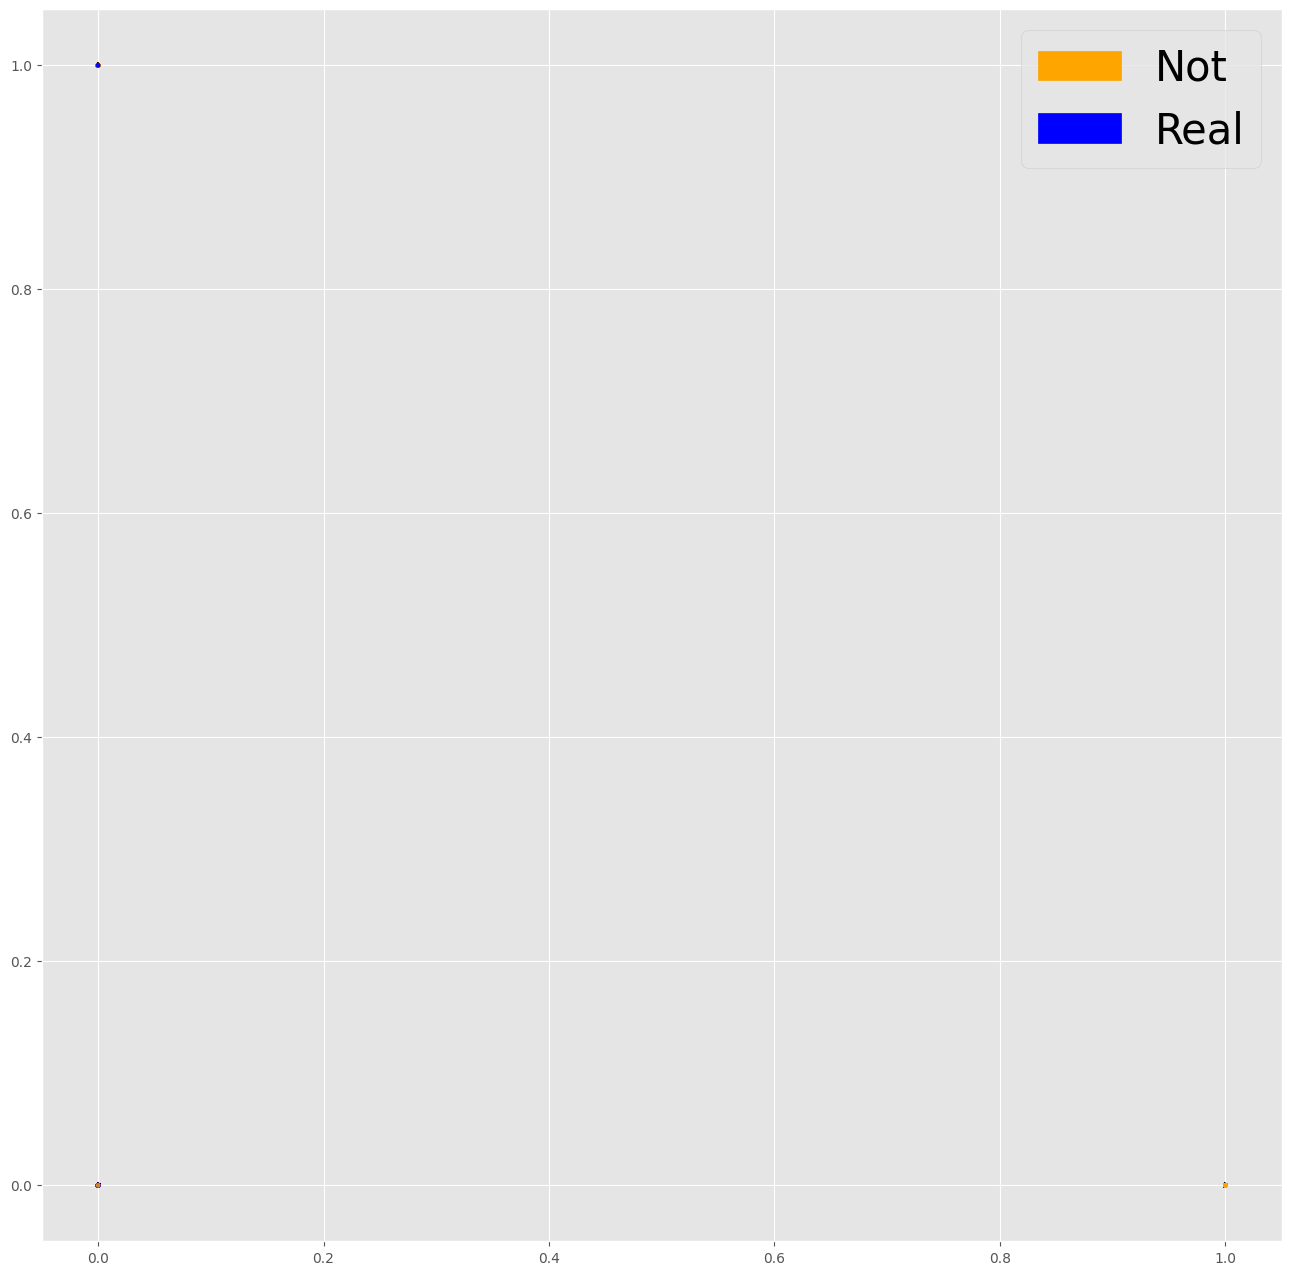

In [ ]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train_counts, y_train)
plt.show()

These embeddings don't look very cleanly separated. Let's see if we can still fit a useful model on them.

## 8. TF IDF <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf,  y_train)
predicted = clf.predict(X_test_tfidf)
np.mean(predicted == y_test)
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      8316
           1       0.78      0.83      0.80     11684

    accuracy                           0.77     20000
   macro avg       0.76      0.75      0.76     20000
weighted avg       0.76      0.77      0.76     20000



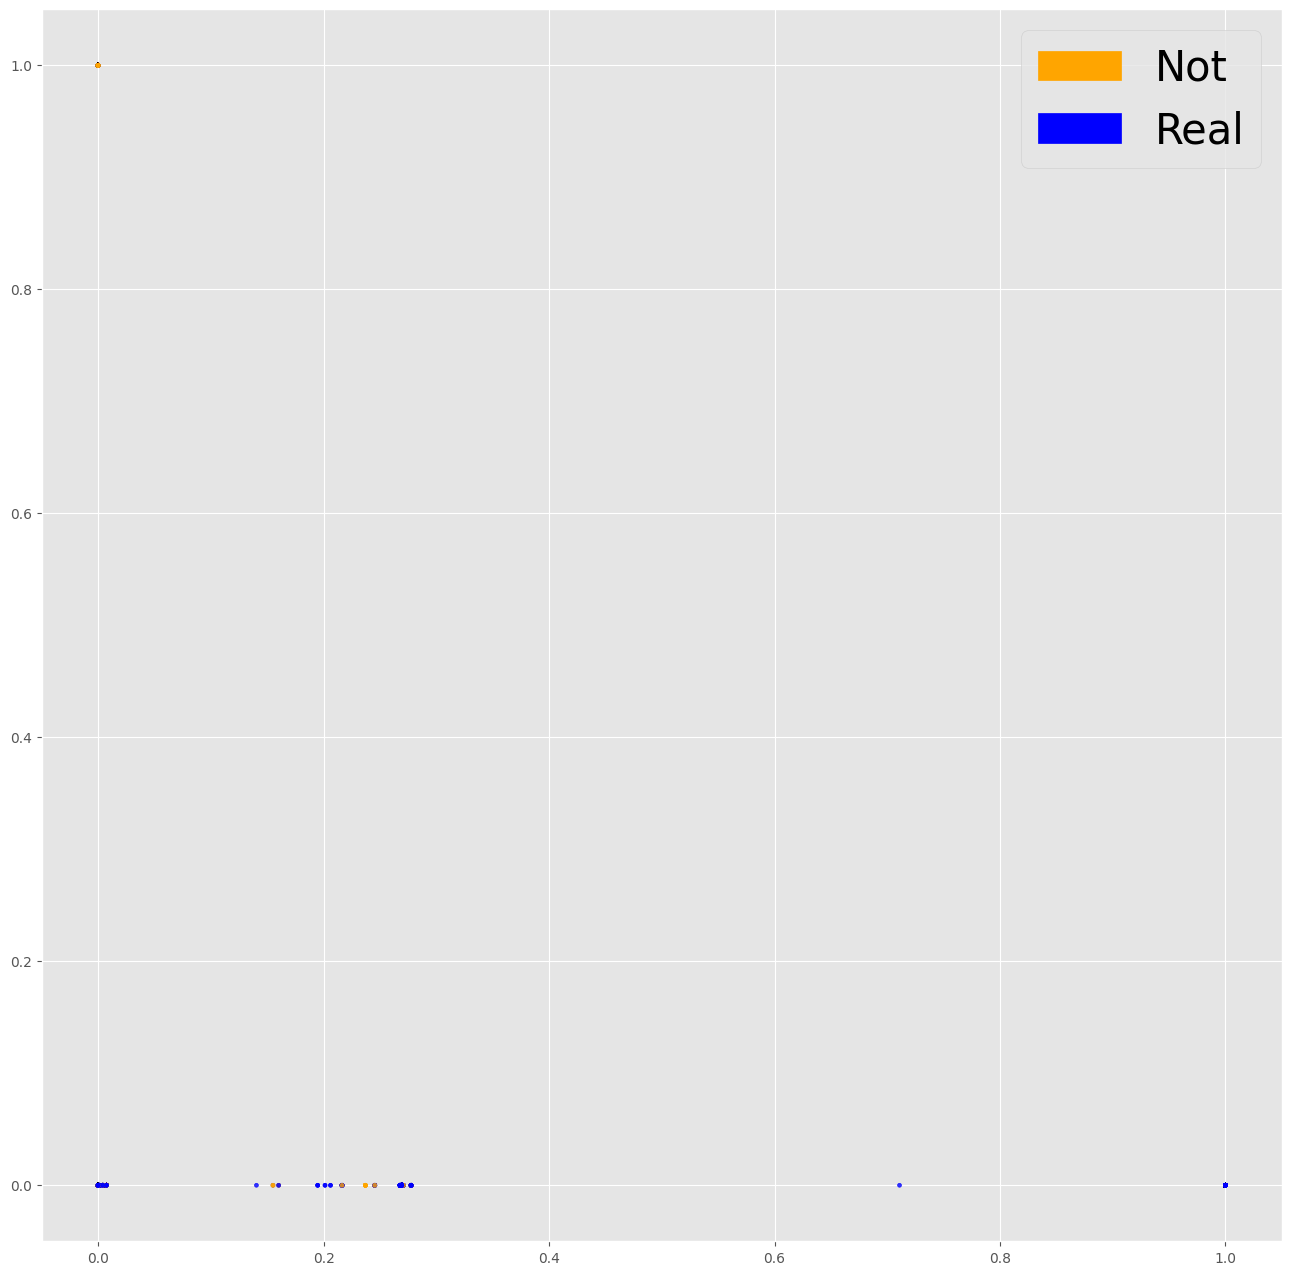

In [ ]:
fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train_tfidf, y_train)
plt.show()

## 9. GloVe <a class="anchor" id="9"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove

Here we will use GloVe pretrained corpus model to represent our words. It is available in 3 varieties : 50D, 100D and 200 Dimentional. We will try 100D here.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ezzmo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def create_corpus_new(df):
    corpus=[]
    for t in tqdm(df['text']):
        t= t.replace('\\',' ') # separate diffrent sustance
        words=[word.lower() for word in word_tokenize(t)]
        corpus.append(words)
    return corpus

In [ ]:
corpus=create_corpus_new(df)

100%|█████████████████████████████████████████████████████████████████████████| 99999/99999 [00:09<00:00, 10742.32it/s]


In [ ]:
corpus

[['diclofenac', 'sodium'],
 ['ranitidine', 'ranitidine', 'hydrochloride'],
 ['dalteparin', 'sodium'],
 ['cyclophosphamide'],
 ['vitamins'],
 ['pregabalin'],
 ['lorazepam'],
 ['thiamine', 'hydrochloride'],
 ['nadolol'],
 ['methotrexate'],
 ['atorvastatin', 'calcium'],
 ['folic', 'acid'],
 ['avobenzone', 'octocrylene', 'triclosan'],
 ['acetaminophen', 'hydrocodone', 'bitartrate'],
 ['lenalidomide'],
 ['benztropine', 'mesylate'],
 ['ruxolitinib'],
 ['escitalopram', 'oxalate'],
 ['nilotinib'],
 ['acetaminophen', 'hydrocodone', 'bitartrate'],
 ['levonorgestrel'],
 ['isotretinoin'],
 ['rivaroxaban'],
 ['atorvastatin', 'calcium'],
 ['atorvastatin', 'calcium'],
 ['albuterol', 'sulfate', 'ipratropium', 'bromide'],
 ['atorvastatin', 'calcium'],
 ['atorvastatin', 'calcium'],
 ['diatrizoate', 'meglumine', 'diatrizoate', 'sodium'],
 ['atorvastatin', 'calcium'],
 ['potassium', 'bicarbonate', 'potassium', 'chloride'],
 ['gabapentin'],
 ['cetirizine', 'hydrochloride'],
 ['bupropion', 'hydrochloride'],

In [ ]:
#Drugs with more than one sunstance
more_than2=0
for c in corpus:
    if len(c)>1:
        more_than2 +=1

more_than2/len(corpus),len(corpus)

(0.42737427374273745, 99999)

In [ ]:
embedding_dict={}
with open('./glove-global-vectors-for-word-representation/glove.6B.100d.txt','r', encoding="utf8") as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

## the embedding example
'and': array([-0.071953,  0.23127 ,  0.023731, -0.50638 ,  0.33923 ,  0.1959  ,
        -0.32943 ,  0.18364 , -0.18057 ,  0.28963 ,  0.20448 , -0.5496  ,
         0.27399 ,  0.58327 ,  0.20468 , -0.49228 ,  0.19974 , -0.070237,
        -0.88049 ,  0.29485 ,  0.14071 , -0.1009  ,  0.99449 ,  0.36973 ,
         0.44554 ,  0.28998 , -0.1376  , -0.56365 , -0.029365, -0.4122  ,
        -0.25269 ,  0.63181 , -0.44767 ,  0.24363 , -0.10813 ,  0.25164 ,
         0.46967 ,  0.3755  , -0.23613 , -0.14129 , -0.44537 , -0.65737 ,
        -0.042421, -0.28636 , -0.28811 ,  0.063766,  0.20281 , -0.53542 ,
         0.41307 , -0.59722 , -0.38614 ,  0.19389 , -0.17809 ,  1.6618  ,
        -0.011819, -2.3737  ,  0.058427, -0.2698  ,  1.2823  ,  0.81925 ,
        -0.22322 ,  0.72932 , -0.053211,  0.43507 ,  0.85011 , -0.42935 ,
         0.92664 ,  0.39051 ,  1.0585  , -0.24561 , -0.18265 , -0.5328  ,
         0.059518, -0.66019 ,  0.18991 ,  0.28836 , -0.2434  ,  0.52784 ,
        -0.65762 , -0.14081 ,  1.0491  ,  0.5134  , -0.23816 ,  0.69895 ,
        -1.4813  , -0.2487  , -0.17936 , -0.059137, -0.08056 , -0.48782 ,
         0.014487, -0.6259  , -0.32367 ,  0.41862 , -1.0807  ,  0.46742 ,
        -0.49931 , -0.71895 ,  0.86894 ,  0.19539 ], dtype=float32),

In [ ]:
#check existnce
t =  ' '.join(df['text'].tolist())
t=  t.replace('\\',' ') # separate diffrent sustance

words=[word.lower() for word in word_tokenize(t)]
words = set(words)
words = np.array(list(words))
words.shape

(1953,)

In [ ]:
in_dic = 0
for w in words:
    emb_vec=embedding_dict.get(w)
    if emb_vec is not None:
        in_dic +=1
in_dic/words.shape[0]

0.44393241167434716

In [ ]:
sub_code = []
new_target=[]
for i,c in enumerate(corpus):
    trg= df.target[i+1]
    for w in c:
        emb_vec=embedding_dict.get(w)
        if emb_vec is not None:
            sub_code.append(emb_vec)
            new_target.append(trg)
len(sub_code)

138602

In [ ]:
sub_code = np.array(sub_code)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sub_code, new_target, test_size=0.2,
                                                                                random_state=random_state_split)

In [ ]:
#Hamza

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train,  y_train)
predicted = clf.predict(X_test)
print(np.mean(predicted == y_test))

from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

0.7330904368529274
              precision    recall  f1-score   support

         0.0       0.70      0.50      0.58     10329
         1.0       0.75      0.87      0.80     17392

    accuracy                           0.73     27721
   macro avg       0.72      0.69      0.69     27721
weighted avg       0.73      0.73      0.72     27721



array([[ 5145,  5184],
       [ 2215, 15177]], dtype=int64)

In [ ]:
#Omar
import gensim
# https://github.com/ncbi-nlp/BioSentVec
# Embeddings using PubMed and the clinical notes from MIMIC-III Clinical Database

word2vec = gensim.models.KeyedVectors.load_word2vec_format(
     'BioWordVec_PubMed_MIMICIII_d200.vec.bin',
      binary=True,
      # limit=None, # this fuckin thing has 4 billion tokens (4E9)
      limit=int(4E7) # faster load if you limit to most frequent terms
)
print('Using %s word vectors.' % len(word2vec.wv.vocab))

FileNotFoundError: [Errno 2] No such file or directory: 'BioWordVec_PubMed_MIMICIII_d200.vec.bin'

In [ ]:
MAX_LEN=10
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [ ]:
sequences

[[230, 4],
 [158, 158, 3],
 [631, 4],
 [264],
 [81],
 [35],
 [199],
 [423, 3],
 [769],
 [36],
 [31, 8],
 [117, 27],
 [583, 563, 960],
 [16, 78, 150],
 [10],
 [669, 40],
 [240],
 [214, 215],
 [204],
 [16, 78, 150],
 [22],
 [96],
 [59],
 [31, 8],
 [31, 8],
 [29, 14, 260, 42],
 [31, 8],
 [31, 8],
 [1015, 564, 1015, 4],
 [31, 8],
 [83, 436, 83, 5],
 [68],
 [228, 3],
 [120, 3],
 [584],
 [51],
 [65, 17],
 [118],
 [21, 3],
 [31, 8],
 [420],
 [6],
 [138],
 [92],
 [19, 25],
 [7],
 [77],
 [152],
 [90],
 [29, 14],
 [414],
 [127, 126, 13, 111],
 [147, 147, 174],
 [632],
 [169, 309, 386, 169, 283, 386, 169, 25, 386, 169, 927],
 [31, 8],
 [68],
 [24, 28],
 [155],
 [66, 66, 26],
 [961],
 [326, 27],
 [74, 137, 83],
 [21, 3],
 [280, 111],
 [670],
 [39],
 [155],
 [537],
 [155],
 [15],
 [19, 25],
 [15],
 [228, 3],
 [245, 277, 245, 277, 3],
 [173],
 [31, 8],
 [142],
 [175, 4],
 [23, 1140, 509, 14],
 [91],
 [429],
 [311],
 [22],
 [31, 8],
 [647, 594, 648],
 [39],
 [75, 76],
 [127, 126, 13, 111],
 [59],
 [7

### represent each statement by sequance of word padded to 50 word only
- sequences contain the original statemnet sequance of words
- tweet_pad contain the padded statemnet sequance of words

In [ ]:
tweet_pad

array([[230,   4,   0, ...,   0,   0,   0],
       [158, 158,   3, ...,   0,   0,   0],
       [631,   4,   0, ...,   0,   0,   0],
       ...,
       [ 15,   0,   0, ...,   0,   0,   0],
       [  6,   0,   0, ...,   0,   0,   0],
       [138,   0,   0, ...,   0,   0,   0]])

In [ ]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 1953


In [ ]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec

100%|██████████████████████████████████████████████████████████████████████████| 1953/1953 [00:00<00:00, 480466.64it/s]


In [ ]:
embedding_matrix.shape

(1954, 100)

In [ ]:
ind = 101
list(word_index.items())[ind] , embedding_matrix[ind][:10]

(('orlistat', 102),
 array([-0.442     ,  0.043613  , -0.27412999,  0.19857   , -0.09102   ,
         0.0063389 ,  0.24995001, -0.16445   ,  0.84241998, -0.82410002]))

In [ ]:
tweet_pad[0][0:]

array([214,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

## Baseline Model with GloVe results

In [ ]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


#optimzer=Adam(learning_rate=3e-4)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           236900    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 317,401
Trainable params: 80,501
Non-trainable params: 236,900
_________________________________________________________________


In [ ]:
train=tweet_pad[:tweet.shape[0]]
test=tweet_pad[tweet.shape[0]:]

In [ ]:
#Training & whoe data size
tweet.shape, tweet_pad.shape

((99999, 17), (99999, 50))

In [ ]:
train.shape, test.shape

((99999, 50), (0, 50))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.2)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (79999, 50)
Shape of Validation  (20000, 50)


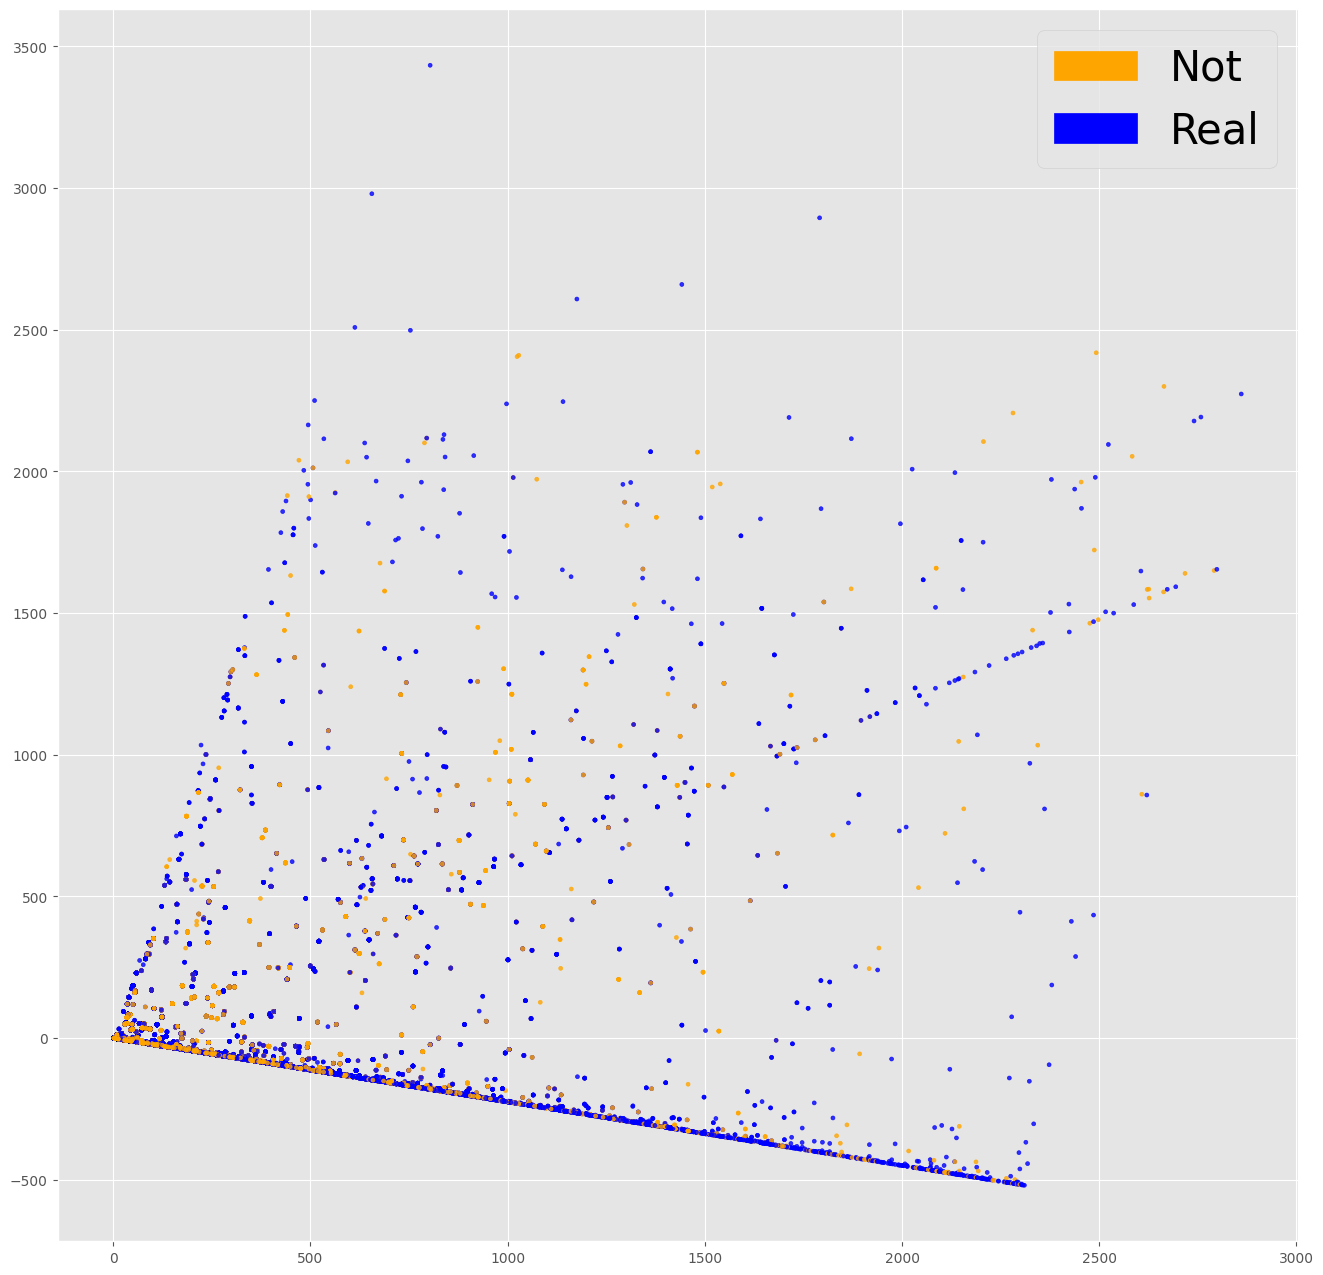

In [ ]:
fig = plt.figure(figsize=(16, 16))
plot_LSA(train,tweet['target'])
plt.show()

In [ ]:
# Recomended 10-20 epochs
history=model.fit(X_train,y_train,batch_size=4,epochs=10,validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
   43/20000 [..............................] - ETA: 2:27:37 - loss: 0.6905 - accuracy: 0.5872

KeyboardInterrupt: 

In [ ]:
train_pred_GloVe = model.predict(X_test)
train_pred_GloVe_int = train_pred_GloVe.round().astype('int')

In [ ]:
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)


In [ ]:
y_train.shape, train_pred_GloVe_int.shape

((6090,), (7613, 1))

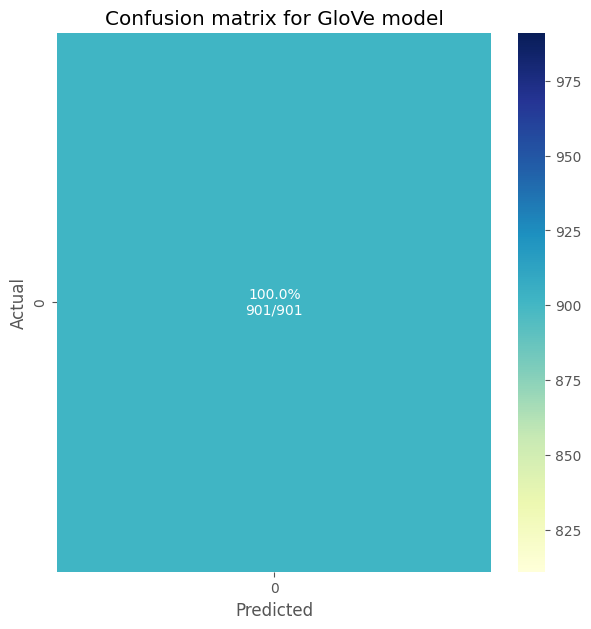

In [ ]:
# Showing Confusion Matrix for GloVe model
plot_cm(train_pred_GloVe_int, y_test, 'Confusion matrix for GloVe model', figsize=(7,7))

## 10. BERT using TFHub <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)

Thanks to very good kernel https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub

In [ ]:
# We will use the official tokenization script created by the Google team
#!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
!pip install bert-tensorflow

In [ ]:
!pip install tensorflow_hub

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

from bert import tokenization
#import tokenization

In [ ]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []

    for text in texts:
        text = tokenizer.tokenize(text)

        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)

        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len

        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)

    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]

    if Dropout_num == 0:
        # Without Dropout
        out = Dense(1, activation='sigmoid')(clf_output)
    else:
        # With Dropout(Dropout_num), Dropout_num > 0
        x = Dropout(Dropout_num)(clf_output)
        out = Dense(1, activation='sigmoid')(x)
    learning_rate=3e-4
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    return model

## Big target correction

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def clean_tweets(tweet):
    """Removes links and non-ASCII characters"""

    tweet = ''.join([x for x in tweet if x in string.printable])

    # Removing URLs
    tweet = re.sub(r"http\S+", "", tweet)

    return tweet

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def remove_punctuations(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"

    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')

    if '...' not in text:
        text = text.replace('..', ' ... ')

    return text

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

## Download data

In [ ]:
# Load BERT from the Tensorflow Hub
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [ ]:
# Load CSV files containing training data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Target correction

In [ ]:
# Thanks to https://www.kaggle.com/wrrosa/keras-bert-using-tfhub-modified-train-data -
# author of this kernel read tweets in training data and figure out that some of them have errors:

target_corrected= False
if target_corrected:
    ids_with_target_error = [328,443,513,2619,3640,3900,4342,5781,6552,6554,6570,6701,6702,6729,6861,7226]
    train.loc[train['id'].isin(ids_with_target_error),'target'] = 0
    train[train['id'].isin(ids_with_target_error)]

In [ ]:
target_big_corrected=True

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
if target_big_corrected:
    train["text"] = train["text"].apply(lambda x: clean_tweets(x))
    test["text"] = test["text"].apply(lambda x: clean_tweets(x))

    train["text"] = train["text"].apply(lambda x: remove_emoji(x))
    test["text"] = test["text"].apply(lambda x: remove_emoji(x))

    train["text"] = train["text"].apply(lambda x: remove_punctuations(x))
    test["text"] = test["text"].apply(lambda x: remove_punctuations(x))

    train["text"] = train["text"].apply(lambda x: convert_abbrev_in_text(x))
    test["text"] = test["text"].apply(lambda x: convert_abbrev_in_text(x))

## Build and train BERT model

In [ ]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
# Load tokenizer from the bert layer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)


In [ ]:
train = df.copy()

In [ ]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
# Encode the text into tokens, masks, and segment flags
#Hamza
#fix the falg error
import sys
from absl import flags
sys.argv=['preserve_unused_tokens=False']
flags.FLAGS(sys.argv)

train_input = bert_encode(train.text.values, tokenizer, max_len=20)
#test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values

In [ ]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
# Build BERT model with my tuning
Dropout_num=0
model_BERT = build_model(bert_layer, max_len=20)
model_BERT.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 20)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 20)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 20)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [ ]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
# Train BERT model with my tuning
checkpoint = ModelCheckpoint('model_BERT.h5', monitor='val_loss', save_best_only=True)
valid = 0.2
epochs_num=2
batch_size_num = 4

train_history = model_BERT.fit(
    train_input, train_labels,
    validation_split = valid,
    epochs = epochs_num, # recomended 3-5 epochs
    callbacks=[checkpoint],
    batch_size = batch_size_num,verbose=1
)

Epoch 1/2
   27/20000 [..............................] - ETA: 3:28:20 - loss: 1.3579 - accuracy: 0.7870

KeyboardInterrupt: 

## Prediction

In [ ]:
# Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub
# Prediction by BERT model with my tuning
model_BERT.load_weights('model_BERT.h5')
test_pred_BERT = model_BERT.predict(test_input)
test_pred_BERT_int = test_pred_BERT.round().astype('int')

In [ ]:
# Prediction by BERT model with my tuning for the training data - for the Confusion Matrix
train_pred_BERT = model_BERT.predict(train_input)
train_pred_BERT_int = train_pred_BERT.round().astype('int')

### 10.1. Submission by BERT<a class="anchor" id="10.1"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/xhlulu/disaster-nlp-keras-bert-using-tfhub

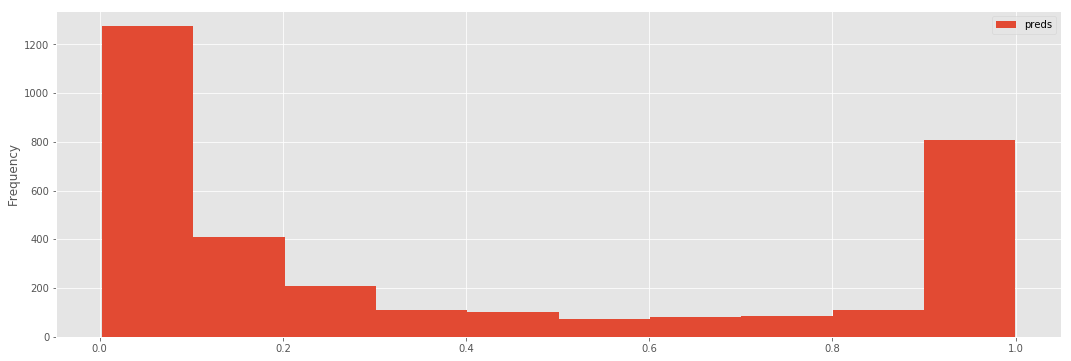

In [ ]:
pred = pd.DataFrame(test_pred_BERT, columns=['preds'])
pred.plot.hist()

In [ ]:
submission['target'] = test_pred_BERT_int
submission.head(10)

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [ ]:
submission.to_csv("submission.csv", index=False, header=True)

## 11. Showing Confusion Matrices<a class="anchor" id="11"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud

In [ ]:
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

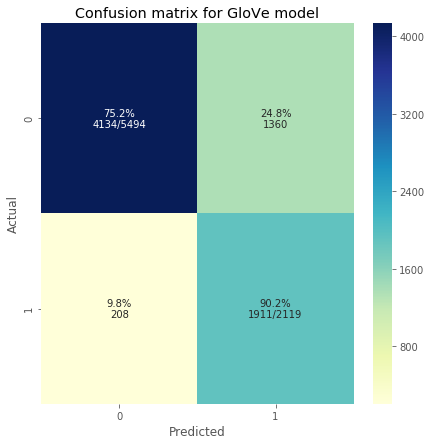

In [ ]:
# Showing Confusion Matrix for GloVe model
plot_cm(train_pred_GloVe_int, train['target'].values, 'Confusion matrix for GloVe model', figsize=(7,7))

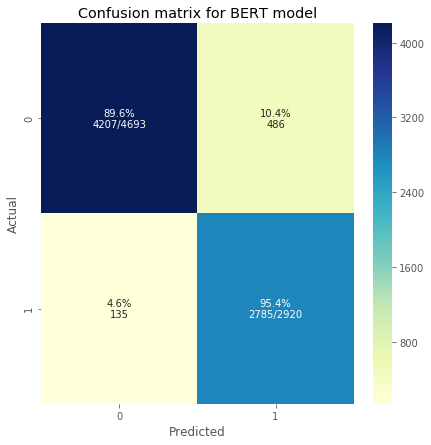

In [ ]:
# Showing Confusion Matrix for BERT model
plot_cm(train_pred_BERT_int, train['target'].values, 'Confusion matrix for BERT model', figsize=(7,7))

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from scipy.stats import poisson, norm

# Set up the API endpoint and search parameters
url = "https://api.fda.gov/drug/event.json"
params = {
    "count": "patient.reaction.reactionmeddrapt.exact",
    "limit": "900",
}
    #"search": "receivedate:[20220101+TO+20220331]",

# Send the API request and parse the response
response = requests.get(url, params=params)
data = response.json()
data

{'error': {'code': 'NOT_FOUND', 'message': 'Nothing to count'}}

In [ ]:

# Convert the data to a pandas dataframe
df = pd.DataFrame(data["results"])
df = df.rename(columns={"term": "reaction", "count": "freq"})

# Set up the adverse event and drug filters
reaction_filter = ["duodenal ulcer", "peptic ulcer", "gastric ulcer", "ulcerative colitis", "abdominal pain", "upper gastrointestinal bleeding", "hematemesis"]
drug_filter = ["aspirin", "ibuprofen", "naproxen", "celecoxib", "diclofenac"]
df.head()

,reaction,freq
0,DRUG INEFFECTIVE,1012182
1,DEATH,656501
2,NAUSEA,615942
3,FATIGUE,591222
4,OFF LABEL USE,538094


In [ ]:


# Filter the data by adverse event and drug
df = df[df["reaction"].isin(reaction_filter)]
df = df[df["patient.drug.medicinalproduct"].isin(drug_filter)]

# Calculate the expected frequency for each drug-adverse event pair
pop_size = 331000000 # US population size in 2020
df["drug_freq"] = df.groupby("patient.drug.medicinalproduct")["freq"].transform(sum)
df["reaction_freq"] = df.groupby("reaction")["freq"].transform(sum)
df["expected_freq"] = (df["drug_freq"] / pop_size) * df["reaction_freq"]

# Calculate the observed-to-expected (O/E) ratio and the 95% confidence interval
df["oe_ratio"] = df["freq"] / df["expected_freq"]
df["lower_ci"] = df.apply(lambda x: poisson.interval(0.95, x["freq"])[0] / x["expected_freq"], axis=1)
df["upper_ci"] = df.apply(lambda x: poisson.interval(0.95, x["freq"])[1] / x["expected_freq"], axis=1)

# Calculate the signal score and filter by significance threshold
df["signal_score"] = df["oe_ratio"] / df["lower_ci"]
df = df[df["signal_score"] > 3]

# Sort the data by signal score and select the top 10 results
df = df.sort_values("signal_score", ascending=False)
df = df.head(10)

# Print the signal score report
print("Drug-Adverse Event Signal Score Report\n")
print(df[["patient.drug.medicinalproduct", "reaction", "signal_score", "oe_ratio", "lower_ci", "upper_ci"]])


KeyError: 'patient.drug.medicinalproduct'

In [ ]:
#code for connect to restdb?


I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

[Go to Top](#0)